In [1116]:
%%html
<div style="background-image: url('cover.png'); background-size: cover; height: 400px; display: flex; align-items: center; justify-content: center; color: white; font-size: 60px;">
    <div style="background-color: rgba(0, 0, 0, 0.5); padding: 20px; border-radius: 10px;">
        <p>Klasifikacija zrna pasulja</p>
    </div>
</div>

## O problemu

**Dataset**: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

**Opis problema**: U ovom projektu korišćeni su različiti algoritmi mašinskog učenja kako bi se klasifikovalo sedam najpoznatijih vrsta pasulja u Turskoj: Barbunya, Bombay, Cali, Dermason, Horoz, Seker i Sira. <br>
Klasifikacija se vrši isključivo na osnovu dimenzija i oblika različitih sorti pasulja, bez dodatnih spoljnih diskriminatornih karakteristika. <br>

### Atributi dataseta

**Area (A)**: Površina oblasti pasulja i broj piksela unutar njenih granica. <br>
**Perimeter (P)**: Opseg pasulja definiše se kao dužina njegove granice. <br>
**MajorAxisLength (L)**: Rastojanje između krajeva najduže linije koja se može povući iz pasulja. <br>
**MinorAxisLength (l)**: Najduža linija koja se može povući iz pasulja dok stoji uspravno u odnosu na glavnu osu. <br>
**AspectRatio (K)**: Definiše odnos između L i l. <br>
**Eccentricity (Ec)**: Ekscentričnost elipse koja ima iste momente kao regija. <br>
**ConvexArea (C)**: Broj piksela u najmanjem konveksnom mnogouglu koji može sadržavati površinu pasuljevog semena. <br>
**EquivDiameter (Ed)**: Prečnik kruga koji ima istu površinu kao i površina pasuljevog semena. <br>
**Extent (Ex)**: Odnos piksela u omeđujućem pravougaoniku prema površini pasulja. <br>
**Solidity (S)**: Takođe poznato kao konveksnost. Odnos piksela u konveksnom omotaču prema onima koji se nalaze u pasulju. <br>
**Roundness (R)**: Izračunava se pomoću sledeće formule: (4 * pi * A)/(P^2) <br>
**Compactness (CO)**: Meri oblik objekta: Ed/L <br>
**ShapeFactor1 (SF1)**: L/d <br>
**ShapeFactor2 (SF2)**: l/d <br>
**ShapeFactor3 (SF3)**: 4A/(L^2 * pi) <br>
**ShapeFactor4 (SF4)**: 4A/(L * l * pi) <br>
**Class**: Klasa pasulja. Može biti BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, i SEKER. <br>

![Beans](beans.jpg)

## Priprema i predobrada podataka

### Importovanje potrebnih modula

In [1117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score, classification_report
from sklearn.metrics import average_precision_score

### Učitavanje podataka

In [1118]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
print("Data Shape:",df.shape) 
df.head(10) 

Data Shape: (13611, 17)


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395     610.29           208.18           173.89          1.20   
1  28734     638.02           200.52           182.73          1.10   
2  29380     624.11           212.83           175.93          1.21   
3  30008     645.88           210.56           182.52          1.15   
4  30140     620.13           201.85           190.28          1.06   
5  30279     634.93           212.56           181.51          1.17   
6  30477     670.03           211.05           184.04          1.15   
7  30519     629.73           213.00           182.74          1.17   
8  30685     635.68           213.53           183.16          1.17   
9  30834     631.93           217.23           180.90          1.20   

   Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
0          0.55       28715         190.14    0.76      0.99       0.96   
1          0.41       29172         191.27    0.78      0.98       0.89   
2          0.56       29690         193.41    0.78      0.99       0.95   
3          0.50       30724         195.47    0.78      0.98       0.90   
4          0.33       30417         195.90    0.77      0.99       0.98   
5          0.52       30600         196.35    0.78      0.99       0.94   
6          0.49       30970         196.99    0.76      0.98       0.85   
7          0.51       30847         197.12    0.77      0.99       0.97   
8          0.51       31044         197.66    0.77      0.99       0.95   
9          0.55       31120         198.14    0.78      0.99       0.97   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0         0.91          0.01          0.00          0.83          1.00  SEKER  
1         0.95          0.01          0.00          0.91          1.00  SEKER  
2         0.91          0.01          0.00          0.83          1.00  SEKER  
3         0.93          0.01          0.00          0.86          0.99  SEKER  
4         0.97          0.01          0.00          0.94          1.00  SEKER  
5         0.92          0.01          0.00          0.85          1.00  SEKER  
6         0.93          0.01          0.00          0.87          1.00  SEKER  
7         0.93          0.01          0.00          0.86          1.00  SEKER  
8         0.93          0.01          0.00          0.86          1.00  SEKER  
9         0.91          0.01          0.00          0.83          1.00  SEKER

### Informacije o podacima

In [1119]:
df.describe()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
count  13611.00   13611.00         13611.00         13611.00      13611.00   
mean   53048.28     855.28           320.14           202.27          1.58   
std    29324.10     214.29            85.69            44.97          0.25   
min    20420.00     524.74           183.60           122.51          1.02   
25%    36328.00     703.52           253.30           175.85          1.43   
50%    44652.00     794.94           296.88           192.43          1.55   
75%    61332.00     977.21           376.50           217.03          1.71   
max   254616.00    1985.37           738.86           460.20          2.43   

       Eccentricity  ConvexArea  EquivDiameter   Extent  Solidity  roundness  \
count      13611.00    13611.00       13611.00 13611.00  13611.00   13611.00   
mean           0.75    53768.20         253.06     0.75      0.99       0.87   
std            0.09    29774.92          59.18     0.05      0.00       0.06   
min            0.22    20684.00         161.24     0.56      0.92       0.49   
25%            0.72    36714.50         215.07     0.72      0.99       0.83   
50%            0.76    45178.00         238.44     0.76      0.99       0.88   
75%            0.81    62294.00         279.45     0.79      0.99       0.92   
max            0.91   263261.00         569.37     0.87      0.99       0.99   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
count     13611.00      13611.00      13611.00      13611.00      13611.00  
mean          0.80          0.01          0.00          0.64          1.00  
std           0.06          0.00          0.00          0.10          0.00  
min           0.64          0.00          0.00          0.41          0.95  
25%           0.76          0.01          0.00          0.58          0.99  
50%           0.80          0.01          0.00          0.64          1.00  
75%           0.83          0.01          0.00          0.70          1.00  
max           0.99          0.01          0.00          0.97          1.00

In [1120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Primećuje se da dataset sadrži isključivo numeričke fičere, dok ciljna promenljiva (class) uzima kategoričke vrednosti.

### Izbacivanje duplikata

In [1121]:
for column in df.columns:
    print(column,df[column].nunique())

Area 12011
Perimeter 13416
MajorAxisLength 13543
MinorAxisLength 13543
AspectRation 13543
Eccentricity 13543
ConvexArea 12066
EquivDiameter 12011
Extent 13535
Solidity 13526
roundness 13543
Compactness 13543
ShapeFactor1 13543
ShapeFactor2 13543
ShapeFactor3 13543
ShapeFactor4 13543
Class 7


In [1122]:
dupl = df.duplicated()
df.drop_duplicates(inplace=True)
print('Broj duplikata: %d' % dupl.sum())

Broj duplikata: 68


Vrši se izbacivanje duplikata, u cilju čišćenja dataset-a od redundantnih informacija

### Provera nedostajućih vrednosti

In [1123]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing values")

No missing values


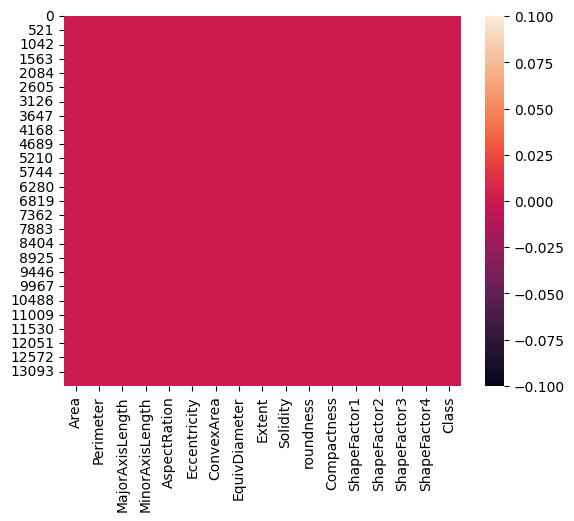

In [1124]:
sns.heatmap(df.isnull())
plt.show()

Primećuje se da dataset nema nedostajućih vrednosti, pa nije potrebno vršiti dodatnu obradu i upotpunjavati podatke koji nedostaju.

### Raspodela podataka po klasama

In [1125]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [1126]:
print(df.Class)

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13543, dtype: object


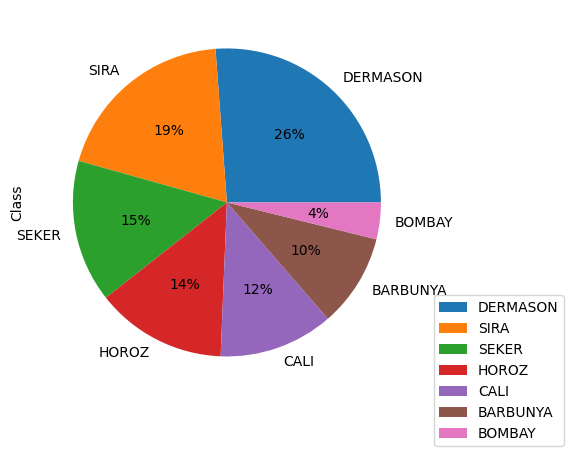

In [1127]:
plt.figure(figsize=(7, 5))
pie = df.Class.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
#plt.savefig("graphs/classdistribution.jpg")
plt.show()

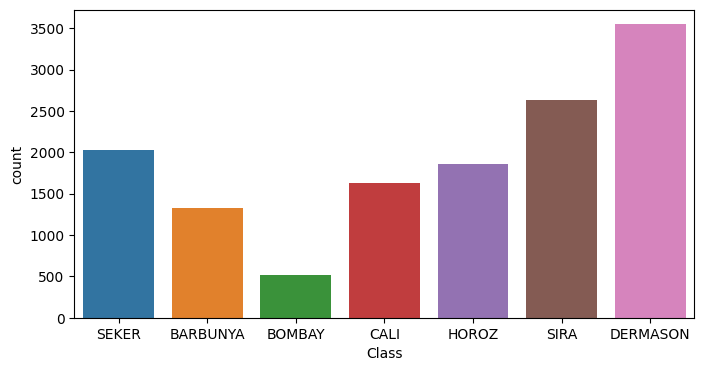

In [1128]:
plt.figure(figsize=(8,4))
sns.countplot(x='Class',data=df)
plt.show()

Primećuje se da nije jednaka raspodela podataka kroz svih sedam klasa pasulja, te se očekuje da će biti potrebno primeniti tehnike za balansiranje dataset-a.

## Deskriptivna analiza i preprocesiranje

### Log transformacija fičera

In [1129]:
def print_attribute_ranges(dataframe):
    for column in dataframe.columns:
        if column != "Class":
            column_range = dataframe[column].min(), dataframe[column].max()
            print(f"{column} range: {column_range}")

In [1130]:
print_attribute_ranges(df)

Area range: (20420, 254616)
Perimeter range: (524.736, 1985.37)
MajorAxisLength range: (183.6011650038393, 738.8601534818813)
MinorAxisLength range: (122.51265345074418, 460.1984968278401)
AspectRation range: (1.0248675960667681, 2.430306446836626)
Eccentricity range: (0.21895126335356507, 0.9114229684680053)
ConvexArea range: (20684, 263261)
EquivDiameter range: (161.24376423134018, 569.3743583287609)
Extent range: (0.55531471681117, 0.8661946405648266)
Solidity range: (0.9192461570857022, 0.9946774999456888)
roundness range: (0.4896182562412148, 0.9906853996160323)
Compactness range: (0.6405767589768725, 0.9873029693778109)
ShapeFactor1 range: (0.0027780126683855494, 0.010451169324378654)
ShapeFactor2 range: (0.0005641690180332927, 0.0036649719644516834)
ShapeFactor3 range: (0.41033858414131424, 0.9747671533422431)
ShapeFactor4 range: (0.9476874027098624, 0.9997325300471389)


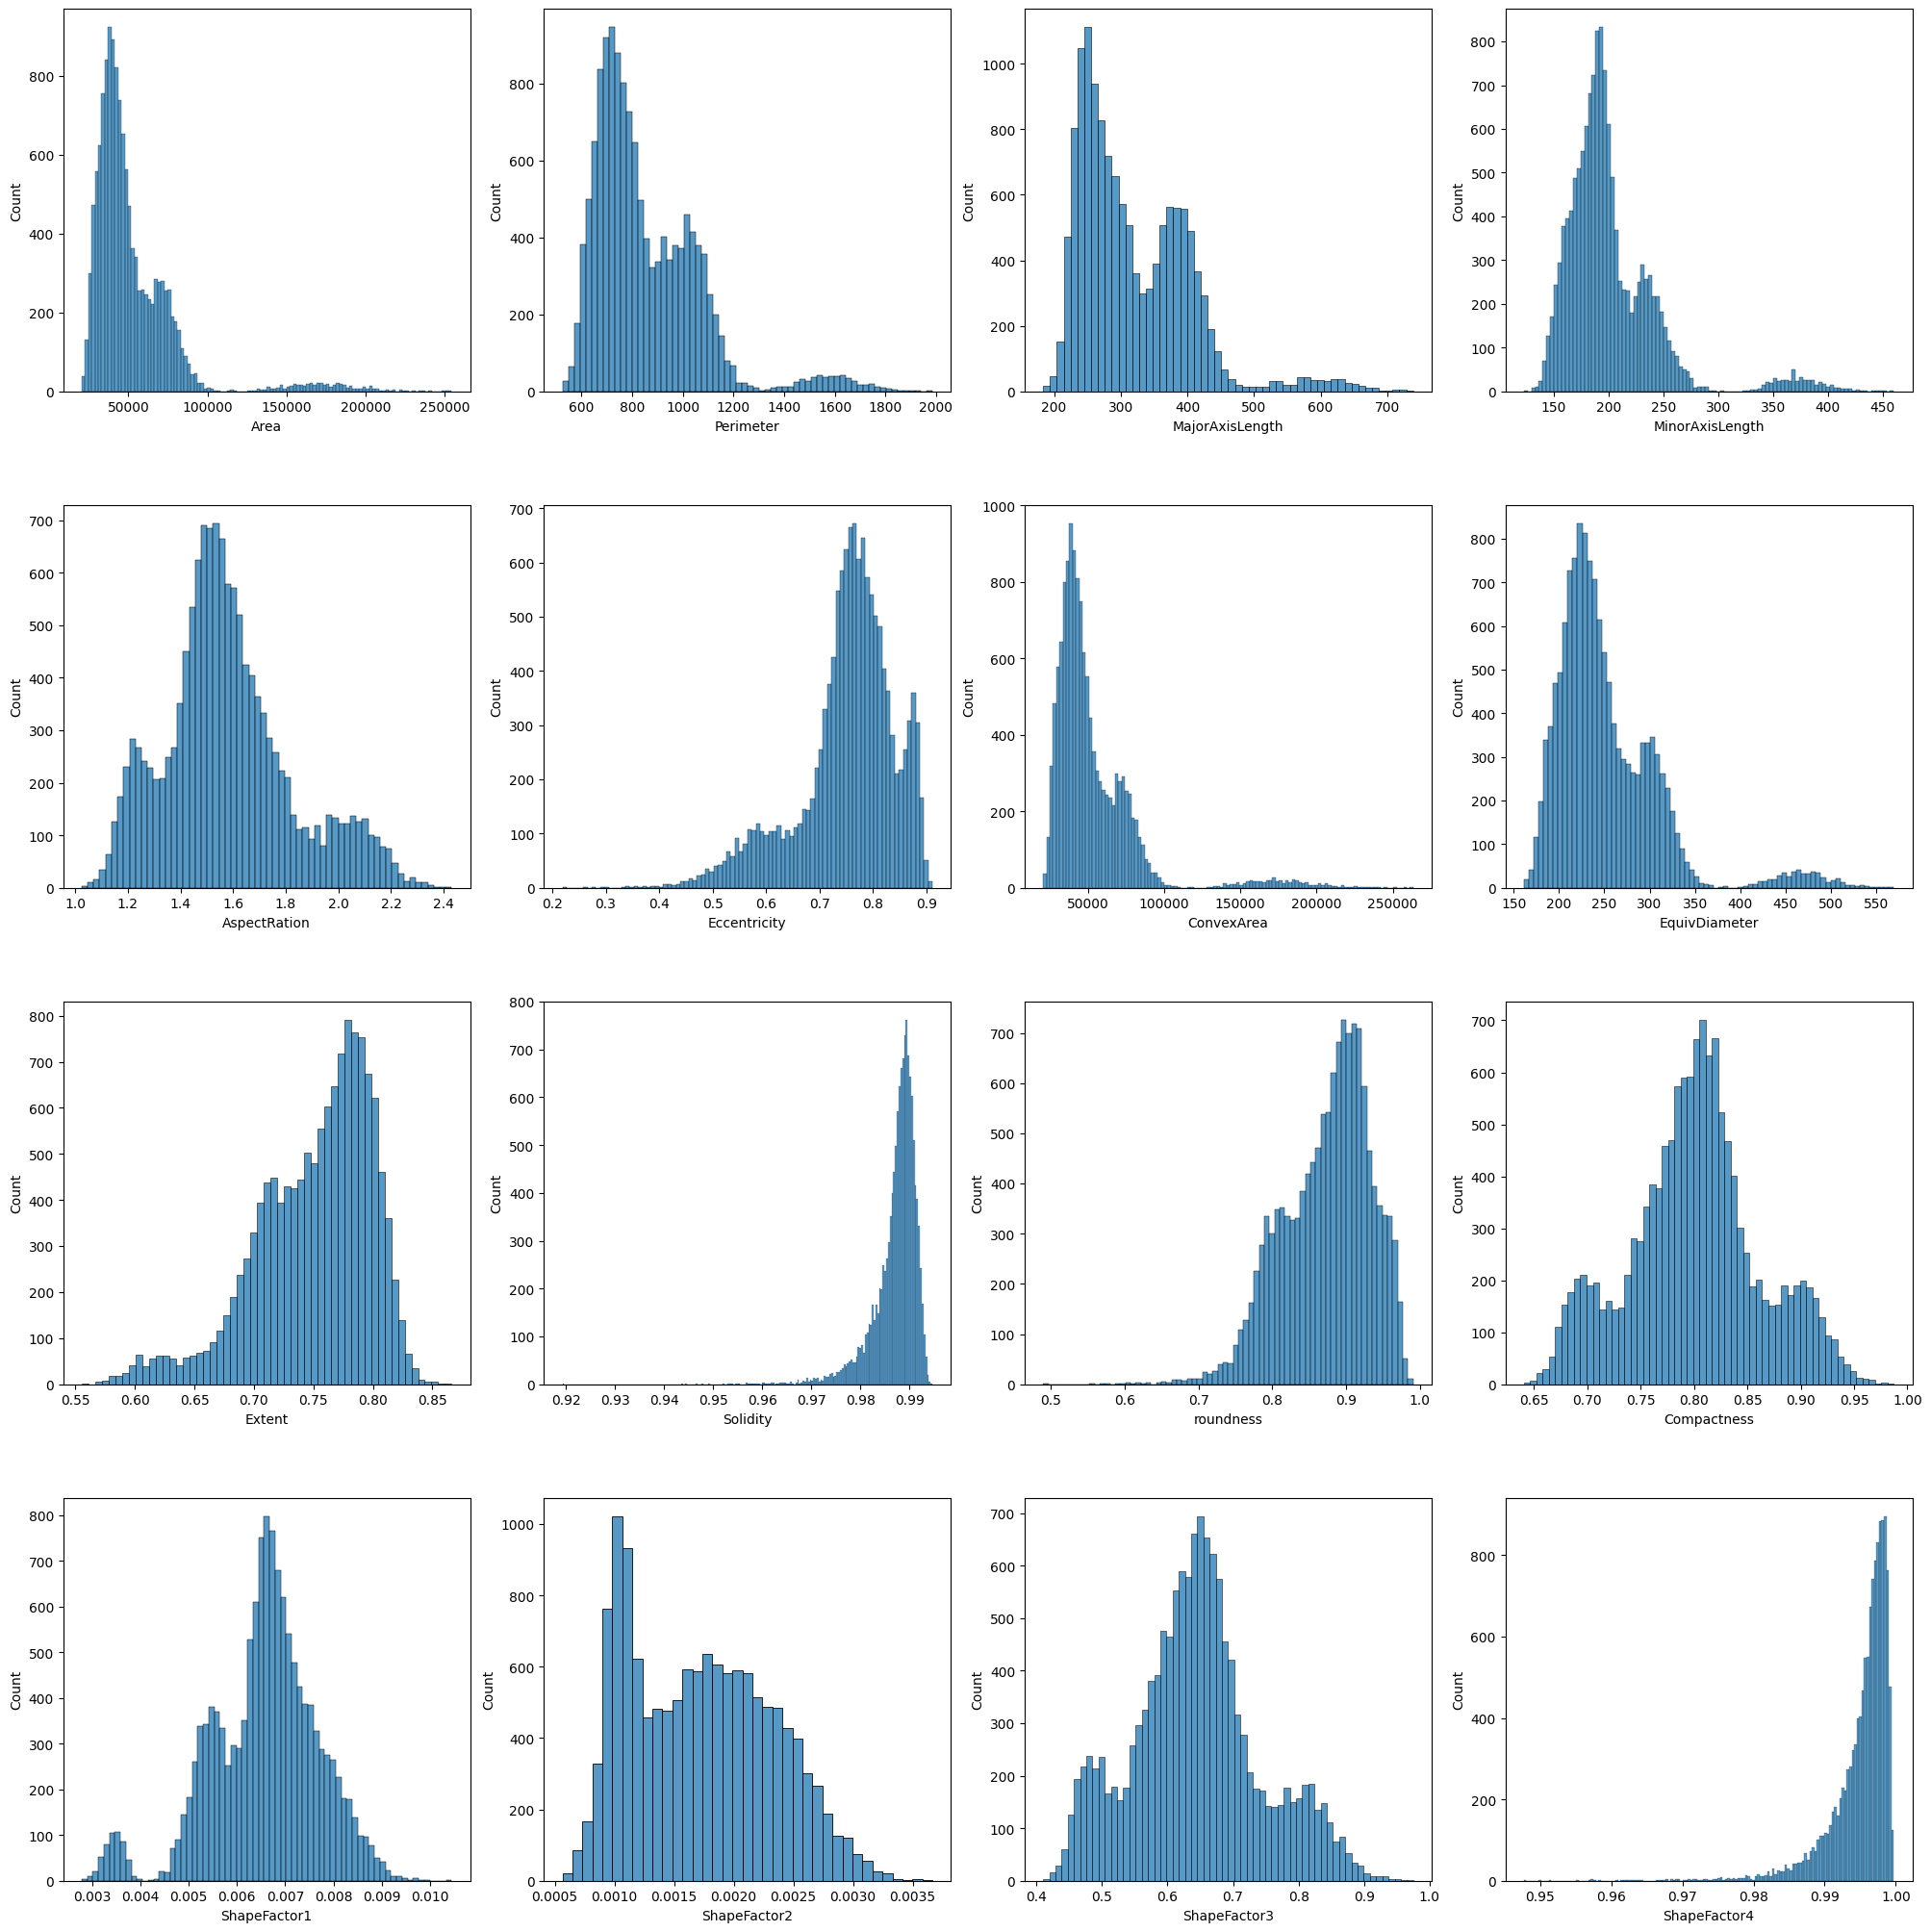

In [1131]:
X = df.drop(['Class'], axis=1)
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
     sns.histplot(v, ax = axs[index])
     index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Primecujemo da su atributi različitih redova veličine, što mogu predstavljati izazov u analizi podataka i modeliranju, posebno kod algoritama koji su osetljivi na razlike u magnitudi podataka. Log transformacija je jedan od načina da se ublaže ove razlike i poboljša performansa modela.

In [1132]:
import numpy as np

numeric_columns = X.columns

print(numeric_columns)

df[numeric_columns] = np.log1p(df[numeric_columns])

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


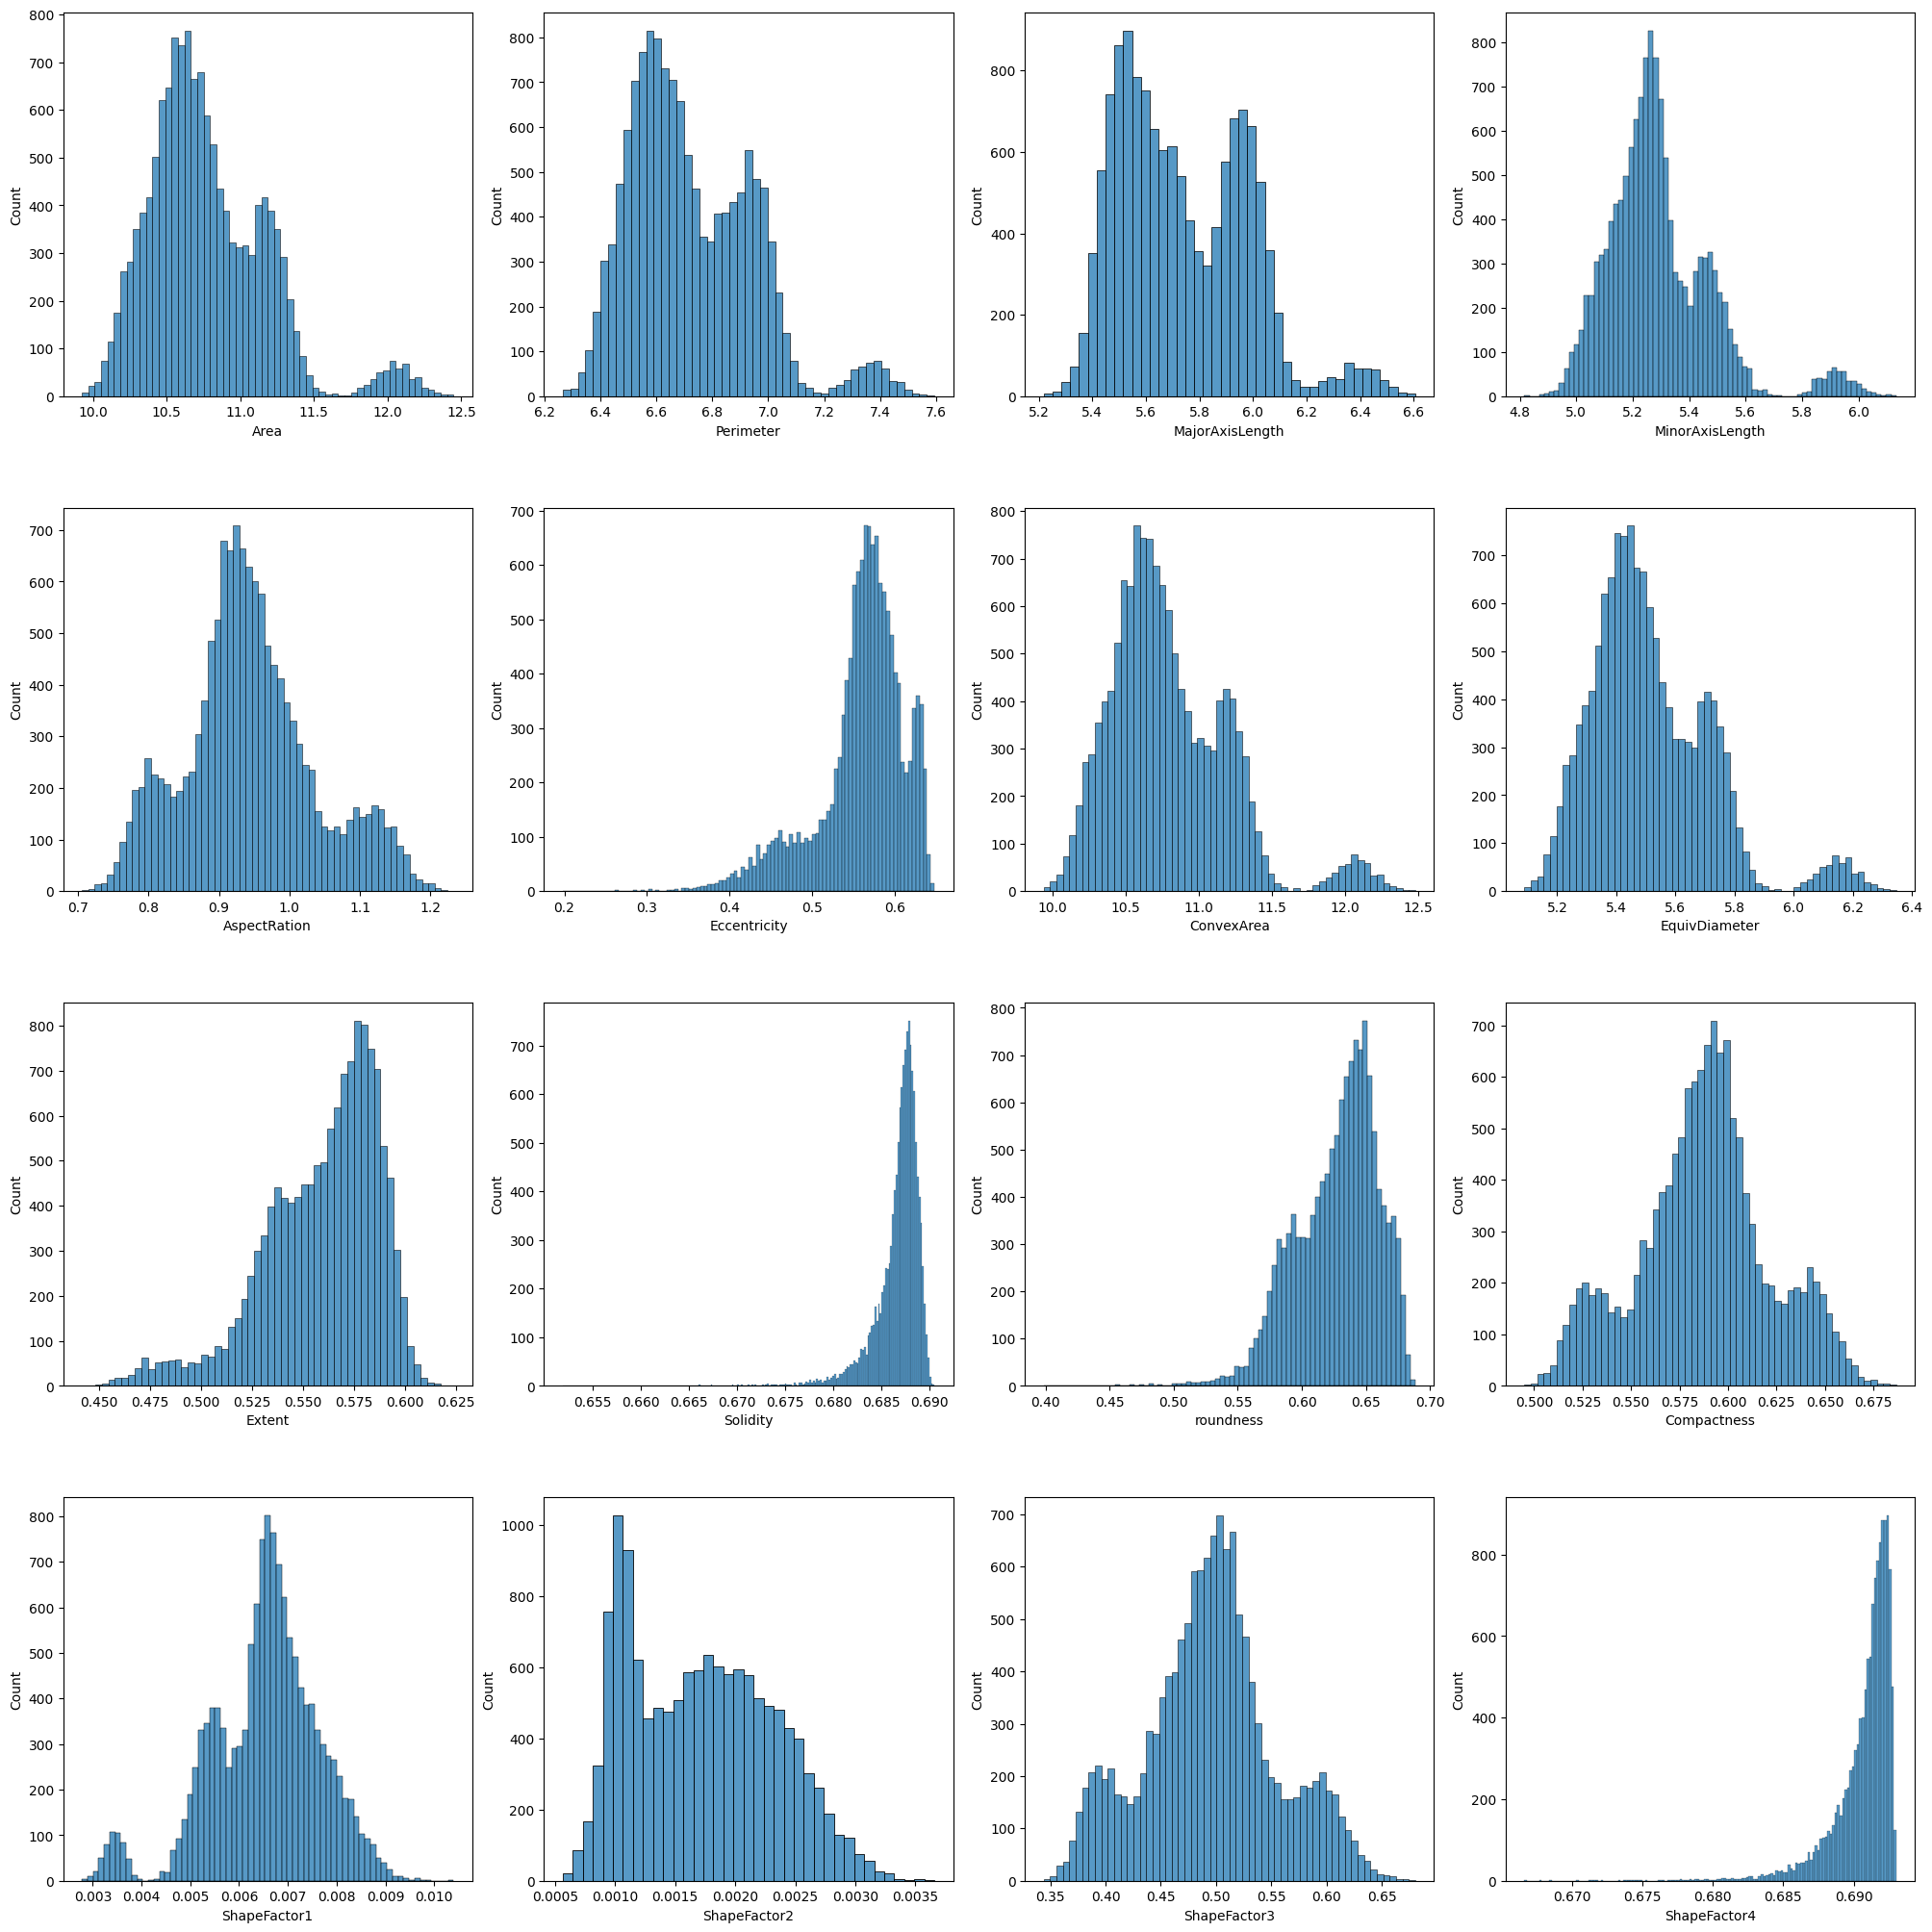

In [1133]:
X = df.drop(['Class'], axis=1)
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
     sns.histplot(v, ax = axs[index])
     index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

### Detekcija Outliera

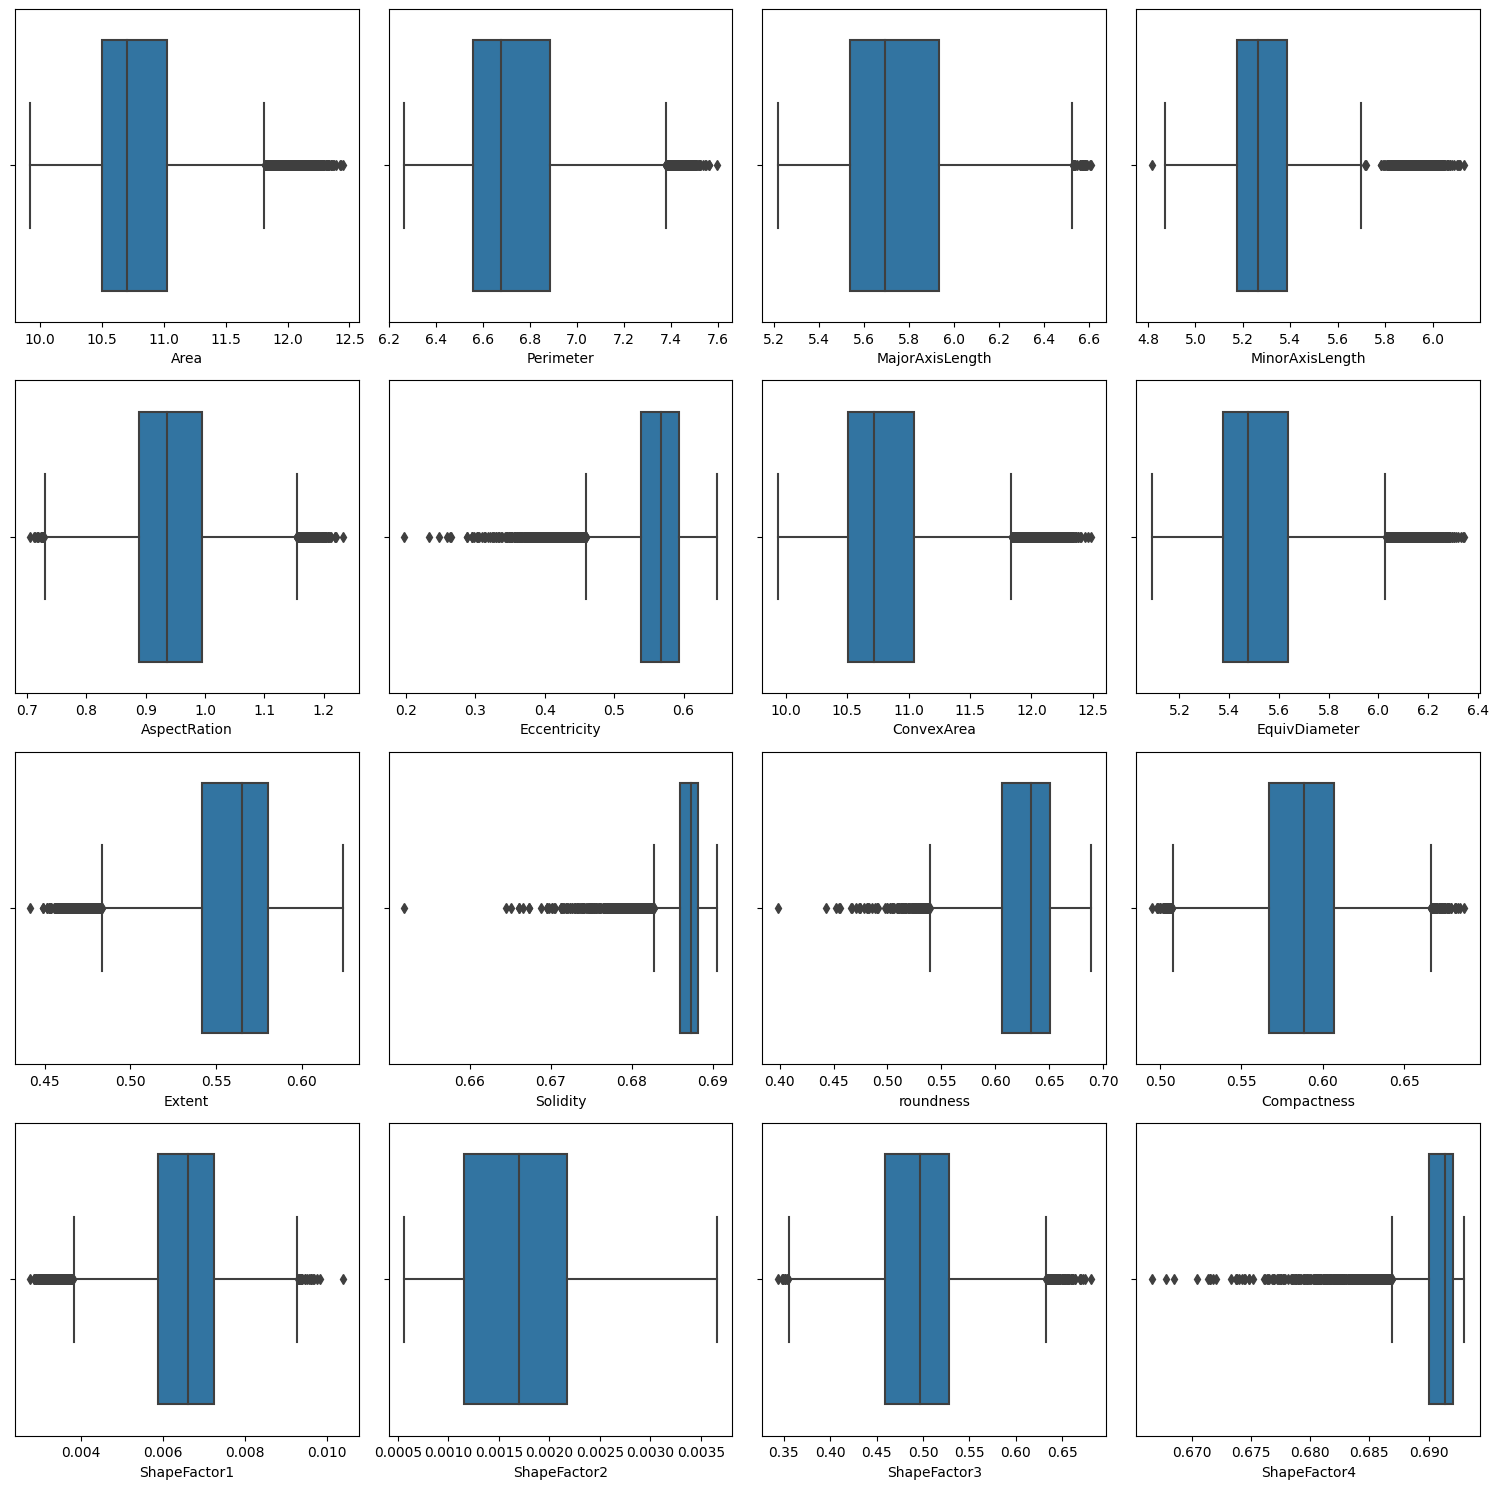

In [1134]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for idx, column in enumerate(df.columns):
    if column != 'Class' and idx < 17:  
        sns.boxplot(x=df[column], ax=axes[idx])
        
plt.tight_layout()
plt.show()

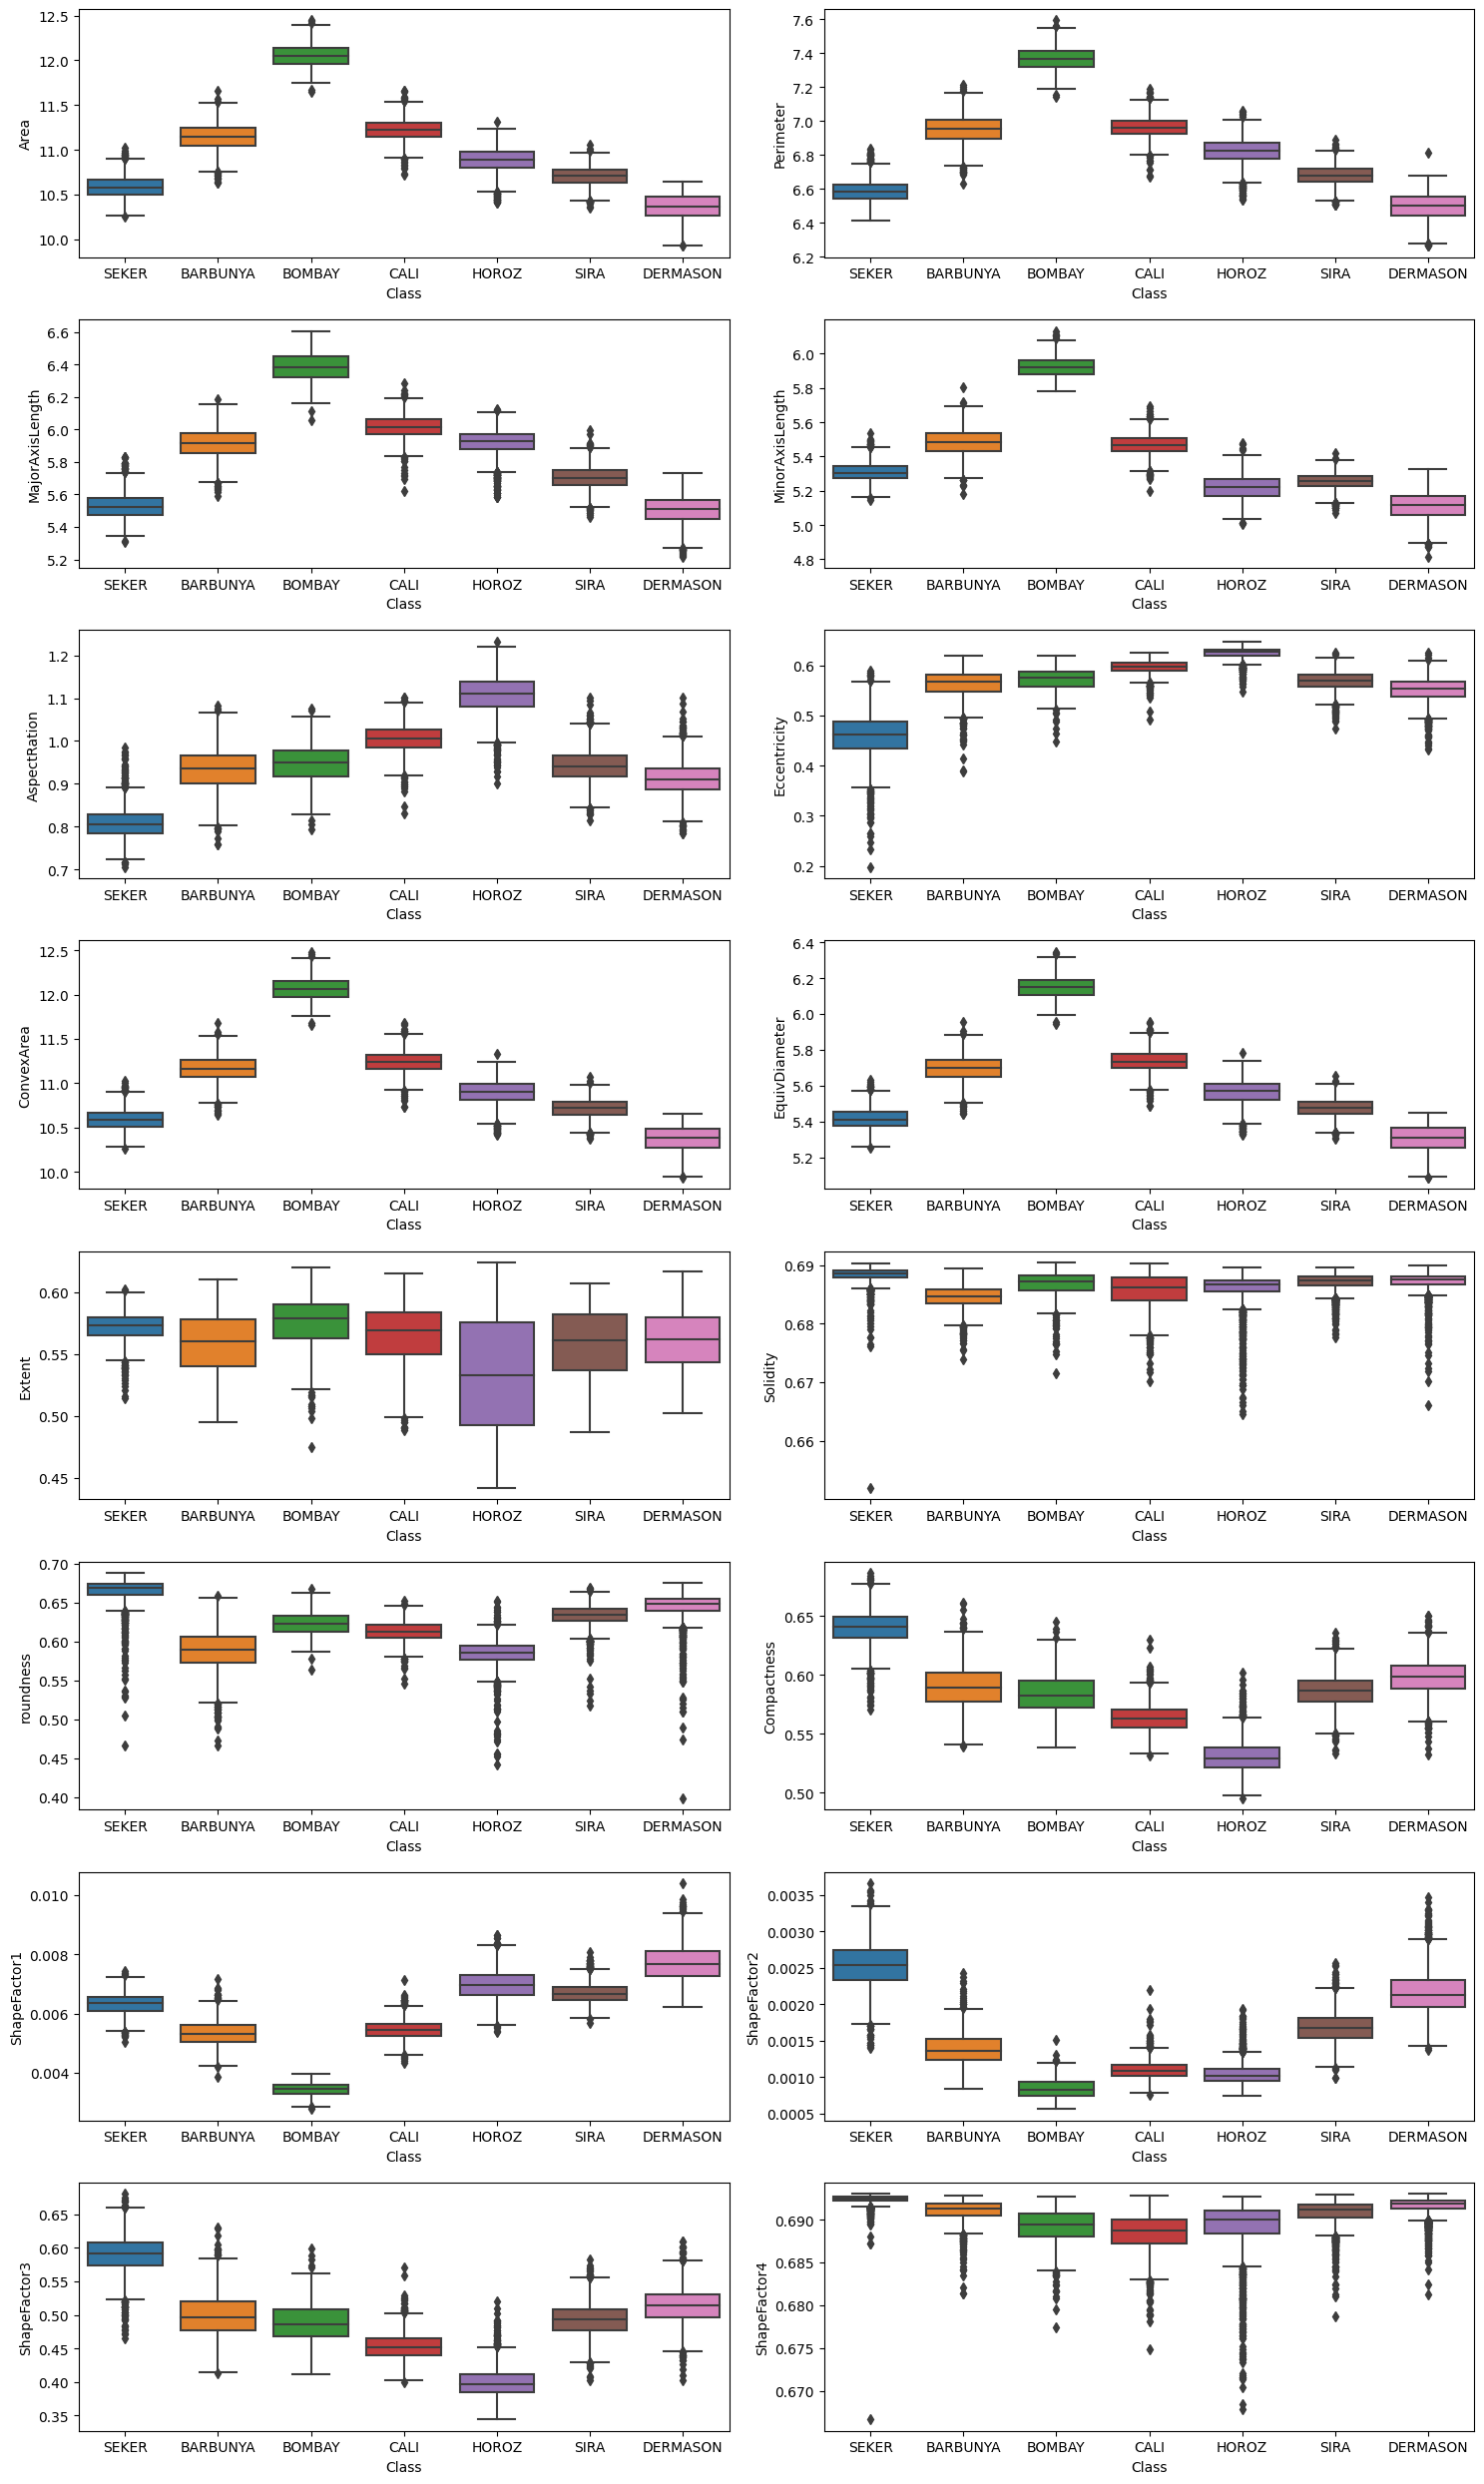

In [1135]:
# Box plotovi kako bi analizirali kako se numeričke vrednosti razlikuju u različitim klasama
# Prikazuju srednju vrednost, kvartile, i eventualne outliere za svaku klasu

Numeric_cols = df.drop(columns=['Class']).columns
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

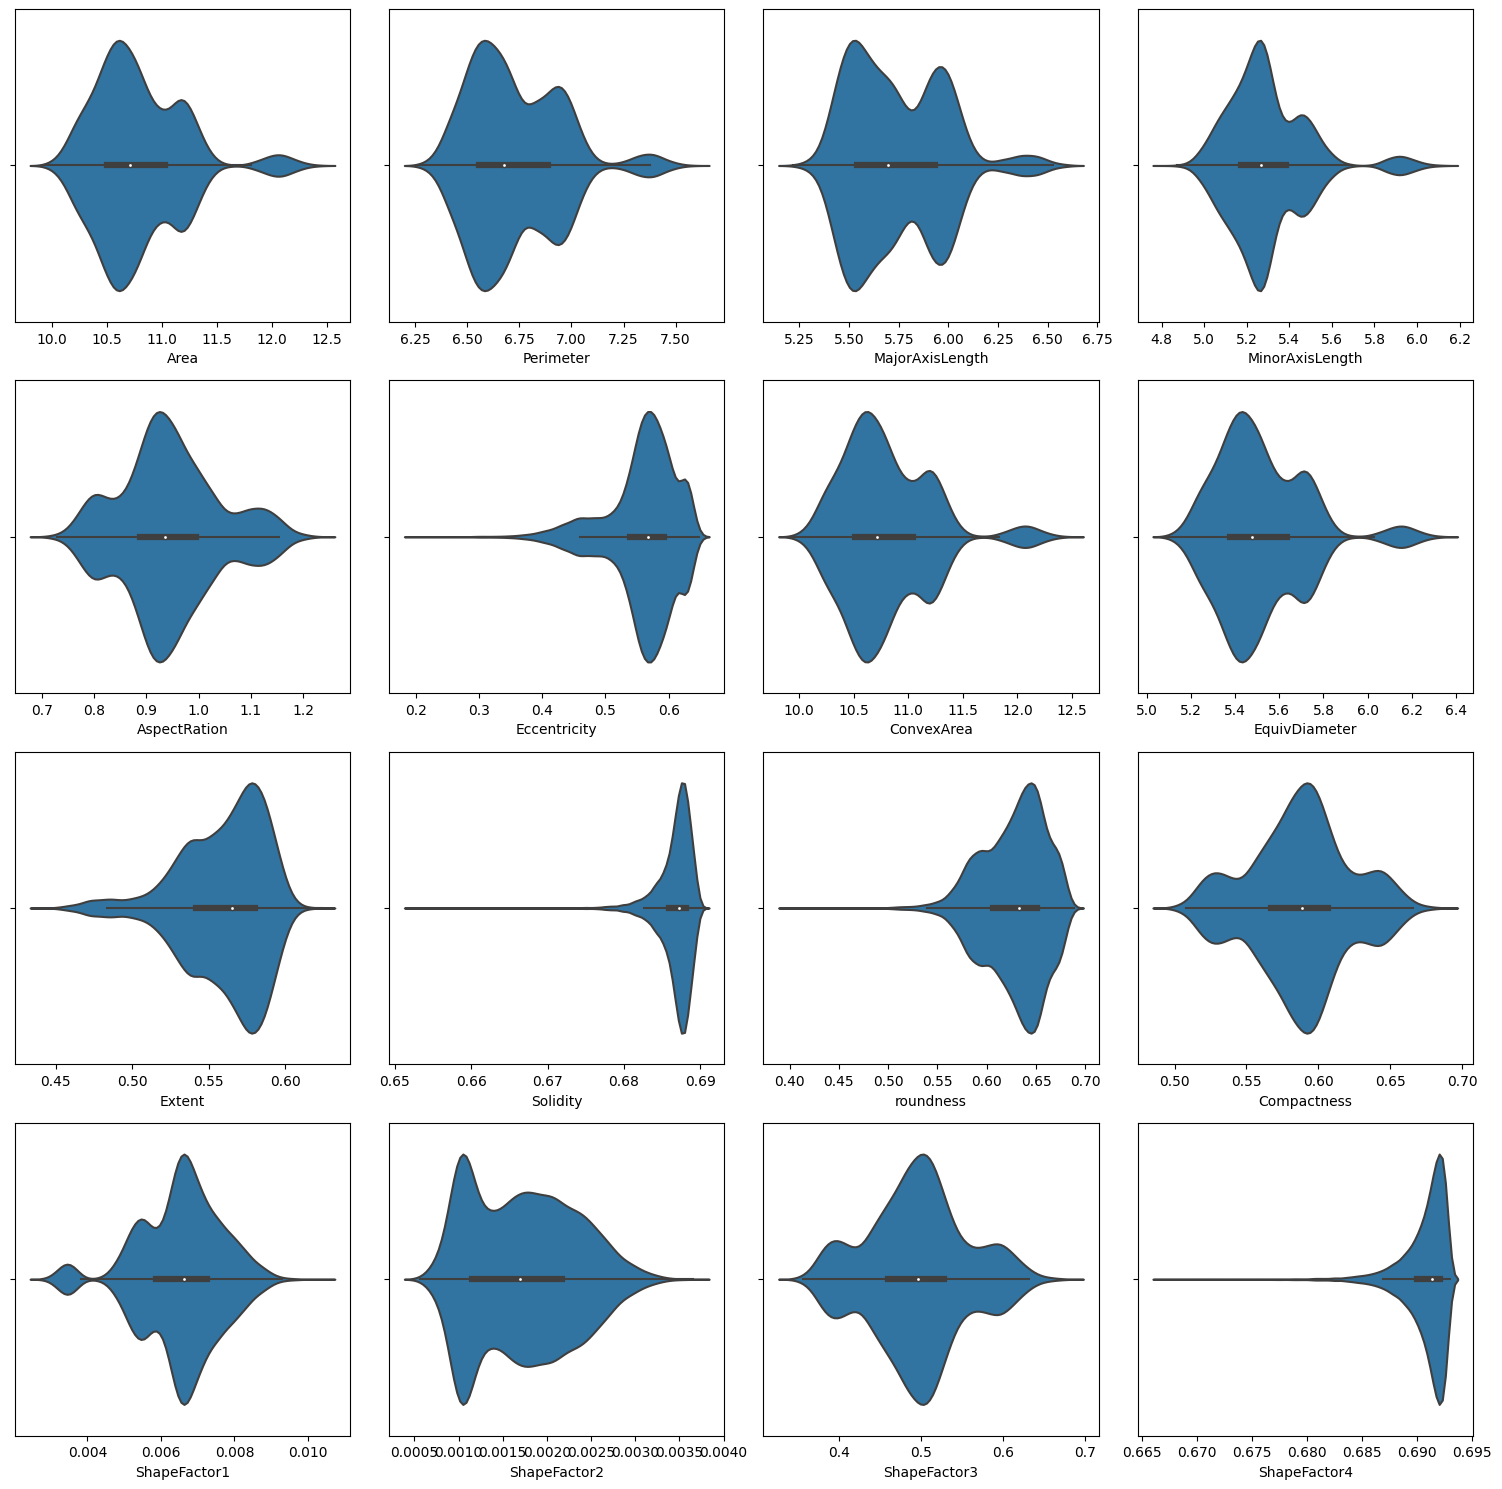

In [1136]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for idx, column in enumerate(df.columns):
    if column != 'Class' and idx < 17:  
        sns.violinplot(x=df[column], ax=axes[idx])
        
plt.tight_layout()
plt.show()

### Izbacivanje Outliera

U cilju izbacivanja outliera, isprobane su tri metode:
1. IRQ
2. Isolation Forest
3. Local Outlier Factor

In [1137]:
def remove_outliers(df):
    for col in df.columns:
        if col != 'Class':
            q25 = np.percentile(df[col] , 25)
            q75 = np.percentile(df[col] , 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lo = q25 - cut_off
            up = q75 + cut_off
            outliers_removed = (df[col] < lo) | (df[col] > up)
            num_outliers_removed = outliers_removed.sum()
            df[col] = df[col].clip(upper = up)
            df[col] = df[col].clip(lower=lo)
            #print(num_outliers_removed)

In [1138]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

def remove_outliers_isolation_forest(df, contamination=0.1):
    features = [col for col in df.columns if col != 'Class']
    model = IsolationForest(contamination=contamination, n_estimators=100, max_samples=256, max_features=10, random_state=42)
    model.fit(df[features])
    outliers = model.predict(df[features])
    df['Outlier'] = outliers
    df_cleaned = df[df['Outlier'] == 1].drop(columns=['Outlier'])
    num_outliers_removed = len(df) - len(df_cleaned)
    print(num_outliers_removed)
    return df_cleaned

In [1139]:

import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

def remove_outliers_lof(df, contamination=0.1):
    features = [col for col in df.columns if col != 'Class']
    model = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    outliers = model.fit_predict(df[features])
    df['Outlier'] = outliers
    df_cleaned = df[df['Outlier'] == 1].drop(columns=['Outlier'])
    num_outliers_removed = len(df) - len(df_cleaned)
    print(num_outliers_removed)
    return df_cleaned

In [1140]:
remove_outliers(df)

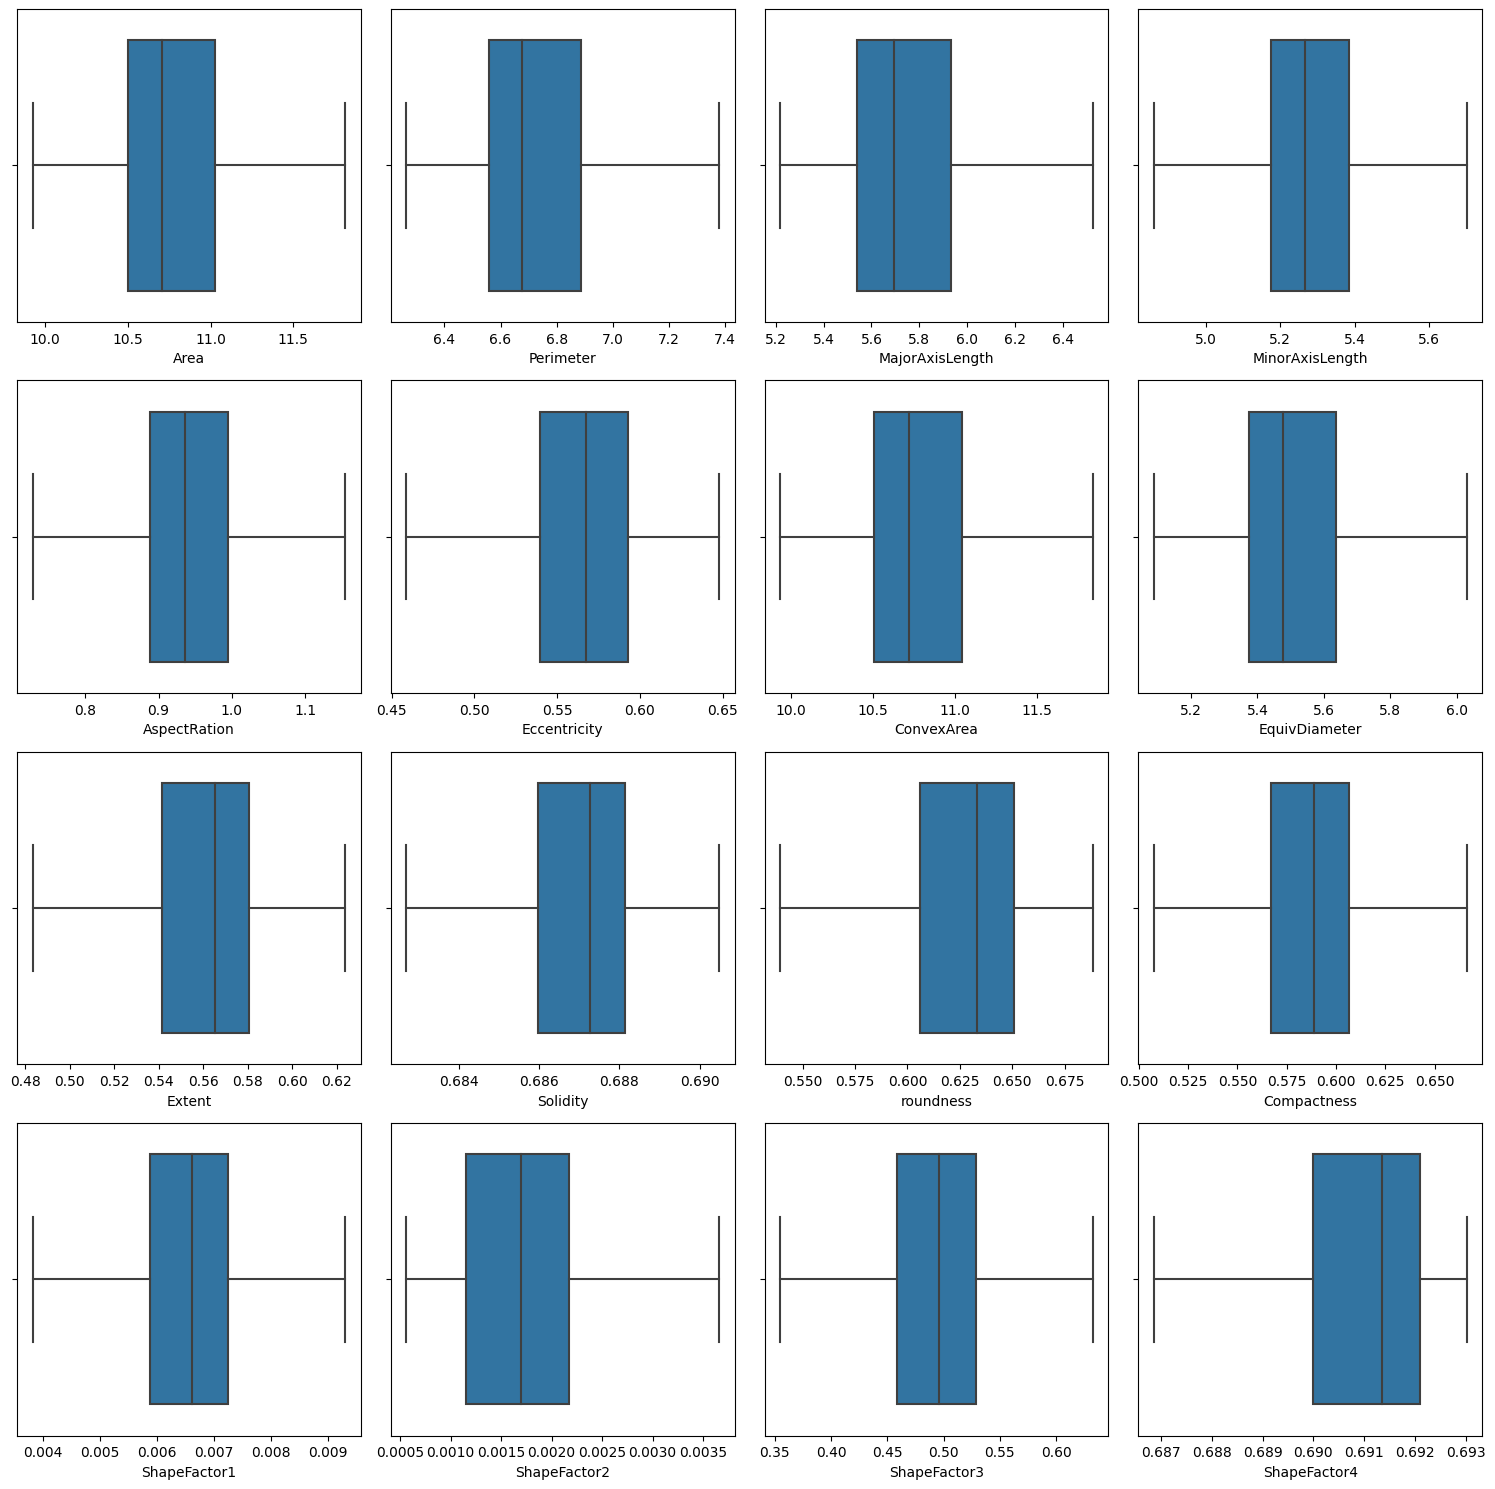

In [982]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for idx, column in enumerate(df.columns):
    if column != 'Class' and idx < 17:  
        sns.boxplot(x=df[column], ax=axes[idx])
        
plt.tight_layout()
plt.show()

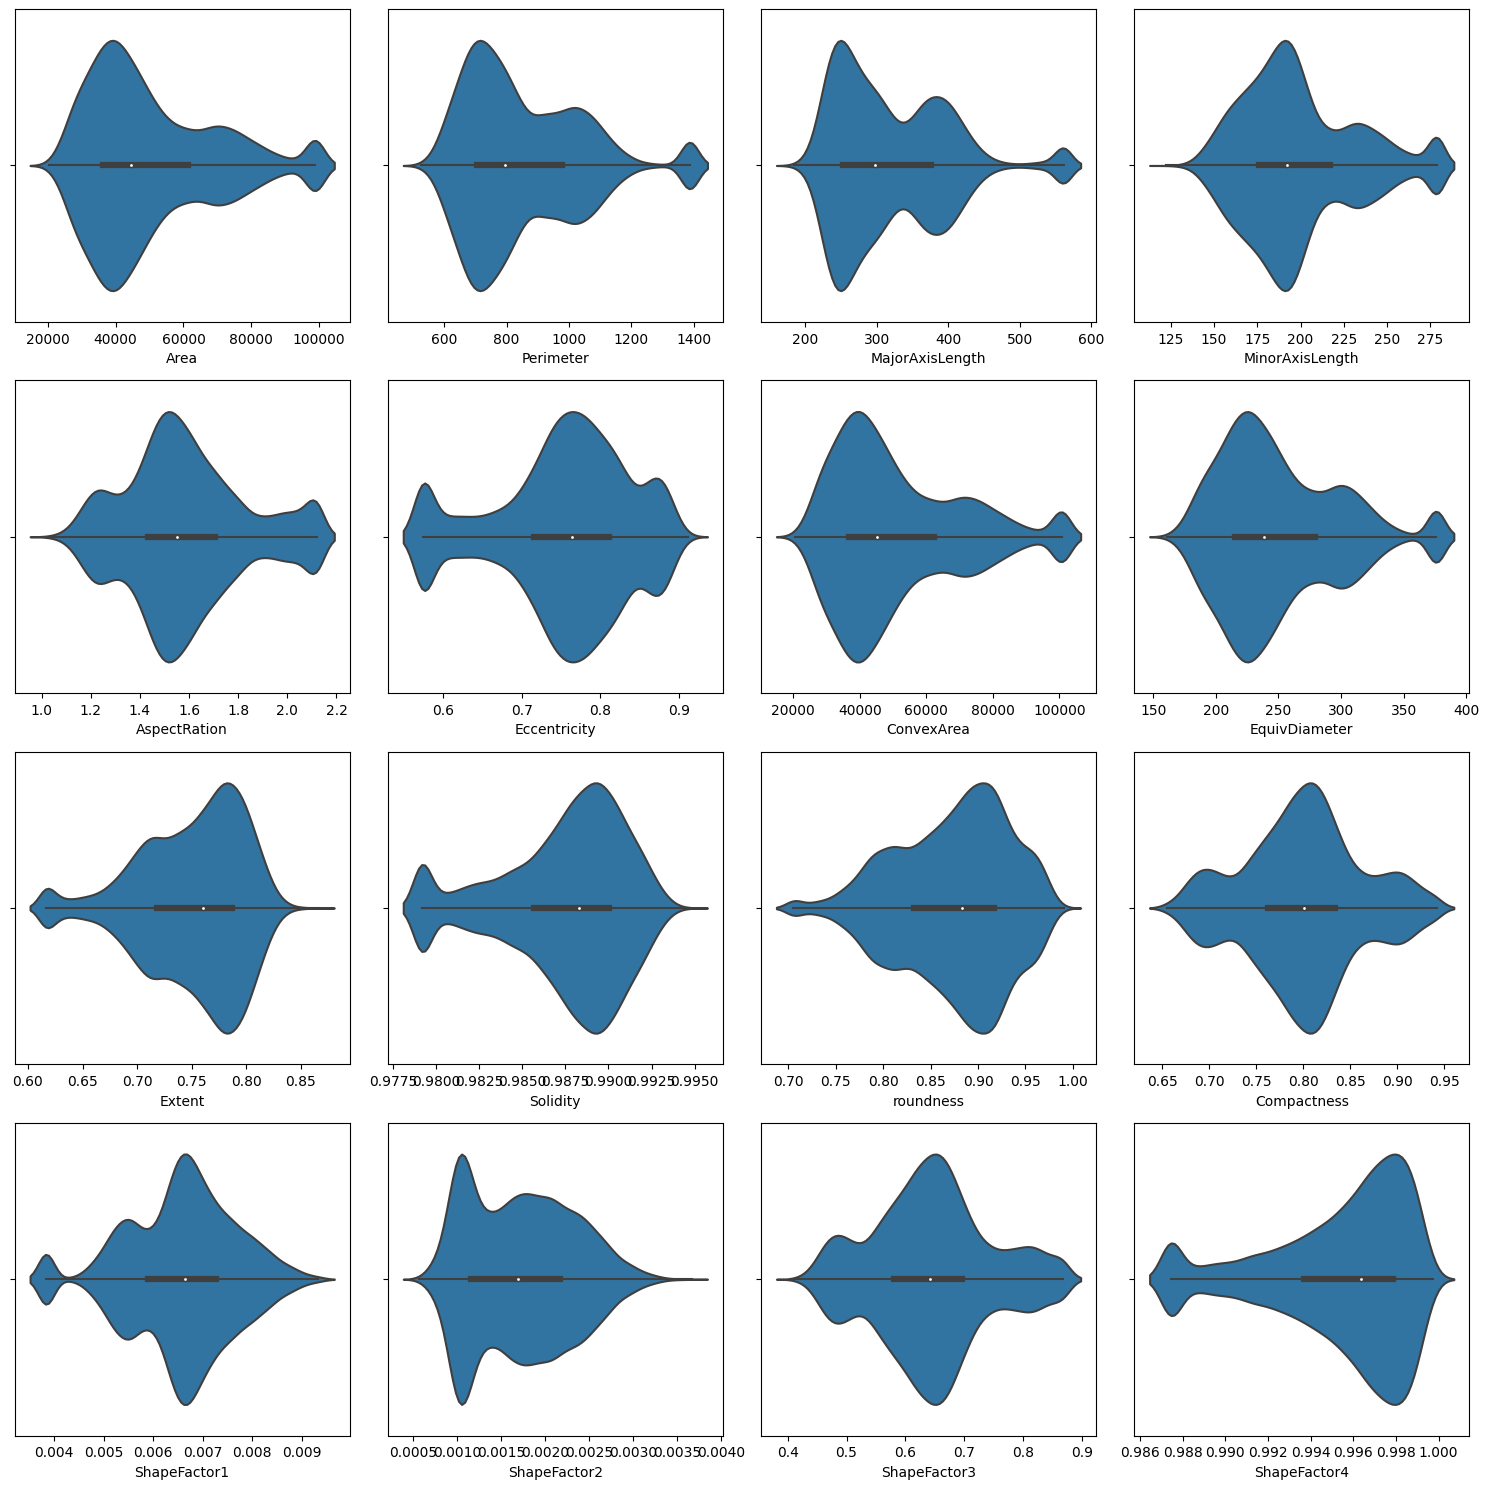

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for idx, column in enumerate(df.columns):
    if column != 'Class' and idx < 17:  
        sns.violinplot(x=df[column], ax=axes[idx])
        
plt.tight_layout()
plt.show()

### Izbacivanje visoko korelisanih fičera

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'Area'),
  Text(1.5, 0, 'Perimeter'),
  Text(2.5, 0, 'MajorAxisLength'),
  Text(3.5, 0, 'MinorAxisLength'),
  Text(4.5, 0, 'AspectRation'),
  Text(5.5, 0, 'Eccentricity'),
  Text(6.5, 0, 'ConvexArea'),
  Text(7.5, 0, 'EquivDiameter'),
  Text(8.5, 0, 'Extent'),
  Text(9.5, 0, 'Solidity'),
  Text(10.5, 0, 'roundness'),
  Text(11.5, 0, 'Compactness'),
  Text(12.5, 0, 'ShapeFactor1'),
  Text(13.5, 0, 'ShapeFactor2'),
  Text(14.5, 0, 'ShapeFactor3'),
  Text(15.5, 0, 'ShapeFactor4'),
  Text(16.5, 0, 'Class')])

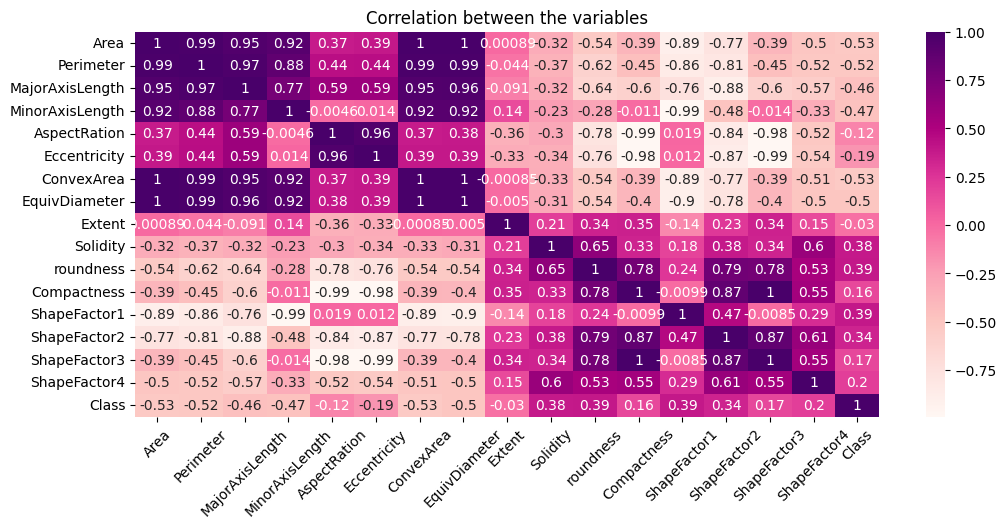

In [79]:
plt.subplots(figsize=(12,5))    #korelacija izmedju podataka
hm_correlation=df.corr()
sns.heatmap(hm_correlation,annot=True,cmap='RdPu') 
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

Na osnovu matrice korelacije, može se zaključiti da pojedini fičeri (ConvexArea i EquivDiameter) imaju visok nivo korelacije sa ostalim fičerima (Convex Area, Area, Perimeter, MajorAxisLength, MinorAxisLength i EquiDiameter su visoko korelisani fičeri), a generalno nisku korelaciju sa Class kolonom. Stoga su ove kolone uklonjenje iz dataset-a.

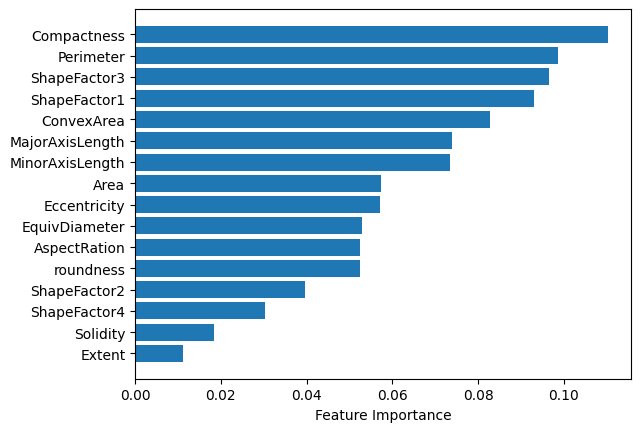

In [1141]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df.drop("Class", axis=1)  
y = df["Class"]

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.show()


In [983]:
df = pd.DataFrame(df, columns=df.columns[:17])

columns_to_drop = ['ConvexArea', 'EquivDiameter']
df.drop(columns=columns_to_drop, inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0.5, 0, 'Area'),
  Text(1.5, 0, 'Perimeter'),
  Text(2.5, 0, 'MajorAxisLength'),
  Text(3.5, 0, 'MinorAxisLength'),
  Text(4.5, 0, 'AspectRation'),
  Text(5.5, 0, 'Eccentricity'),
  Text(6.5, 0, 'ConvexArea'),
  Text(7.5, 0, 'EquivDiameter'),
  Text(8.5, 0, 'Extent'),
  Text(9.5, 0, 'Solidity'),
  Text(10.5, 0, 'roundness'),
  Text(11.5, 0, 'Compactness'),
  Text(12.5, 0, 'ShapeFactor1'),
  Text(13.5, 0, 'ShapeFactor2'),
  Text(14.5, 0, 'ShapeFactor3'),
  Text(15.5, 0, 'ShapeFactor4')])

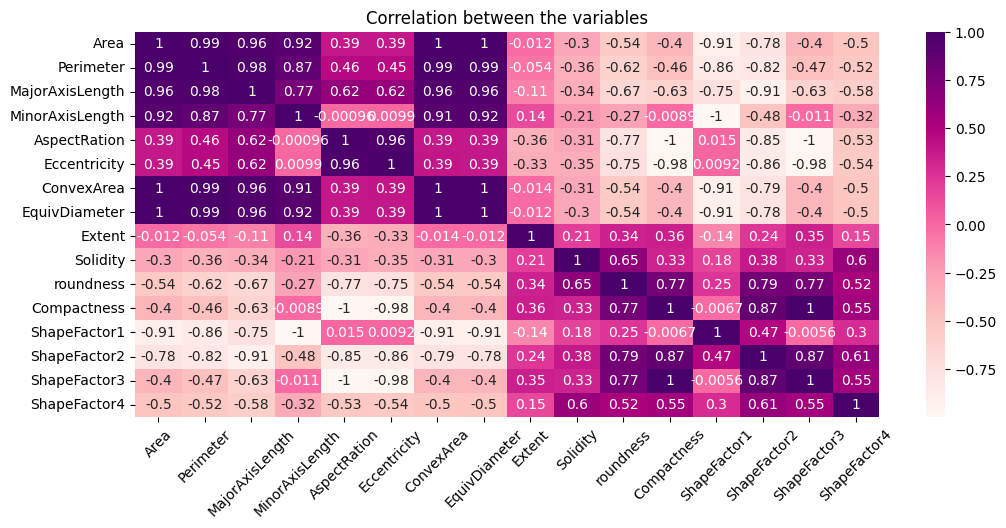

In [1142]:
plt.subplots(figsize=(12,5))    #korelacija izmedju podataka
sns.heatmap(hm_correlation,annot=True,cmap='RdPu') 
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

### One-hot-Encoding Class kolone

In [984]:
print(np.unique(df.Class))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [992]:
class_mapping = {
    'BARBUNYA': 0,
    'BOMBAY': 1,
    'CALI': 2,
    'DERMASON': 3,
    'HOROZ': 4,
    'SEKER': 5,
    'SIRA': 6
}

df['Class'] = df['Class'].replace(class_mapping)

In [994]:
print(np.unique(df.Class))

[0 1 2 3 4 5 6]


## Primena algoritama nadgledanog učenja

### Podela na skupove za treniranje i testiranje

In [995]:
from sklearn.model_selection import train_test_split

data=df.values
X=data[:,0:14]
y=data[:,14]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(f"Broj uzoraka u trening skupu podataka: {len(X_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(X_test)}")

Broj uzoraka u trening skupu podataka: 9480
Broj uzoraka u test skupu podataka: 4063


### Lazy Classifier za evaluaciju modela

U cilju lakšeg prepoznavanja modela mašinskog učenja koje je pogodno koristiti u slučaju našeg dataset-a, upotrebljen je LazyClassifier, koji daje brzu procenu tačnosti različitih klasifikatora.

In [60]:
from lazypredict.Supervised import LazyClassifier
# Kreiranje LazyClassifier objekta
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [61]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:33<00:01,  1.03s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 9480, number of used features: 14
[LightGBM] [Info] Start training from score -2.306813
[LightGBM] [Info] Start training from score -3.240738
[LightGBM] [Info] Start training from score -2.099903
[LightGBM] [Info] Start training from score -1.354322
[LightGBM] [Info] Start training from score -1.995318
[LightGBM] [Info] Start training from score -1.892209
[LightGBM] [Info] Start training from score -1.639962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

100%|██████████| 29/29 [00:35<00:00,  1.22s/it]


In [62]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.93               0.94    None      0.93   
LogisticRegression                 0.92               0.94    None      0.92   
KNeighborsClassifier               0.92               0.94    None      0.92   
LGBMClassifier                     0.92               0.93    None      0.92   
RandomForestClassifier             0.92               0.93    None      0.92   
XGBClassifier                      0.92               0.93    None      0.92   
BaggingClassifier                  0.92               0.93    None      0.92   
ExtraTreesClassifier               0.92               0.93    None      0.92   
CalibratedClassifierCV             0.92               0.93    None      0.92   
LinearSVC                          0.92               0.93    None      0.92   
SGDClassifier                      0.92 

### LGBM Classifier

In [996]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lgbm_model = LGBMClassifier(verbose=-1)

lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accuracyLGBM = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracyLGBM*100:.2f}")


Accuracy: 92.64


In [997]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

lgbm_model2 = make_pipeline(StandardScaler(), LGBMClassifier(verbose=-1))

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(lgbm_model2, X, y, cv=cv, scoring='accuracy')

average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")



Average Cross-validated Accuracy: 92.68%


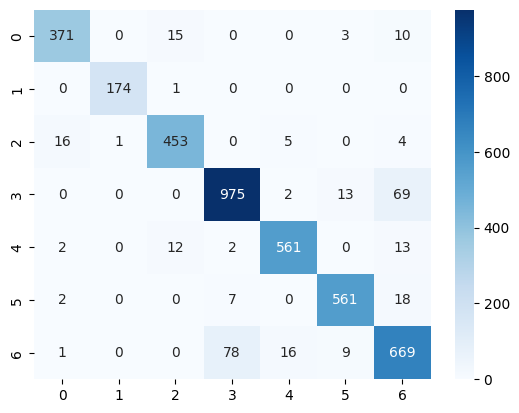

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       399
         1.0       0.99      0.99      0.99       175
         2.0       0.94      0.95      0.94       479
         3.0       0.92      0.92      0.92      1059
         4.0       0.96      0.95      0.96       590
         5.0       0.96      0.95      0.96       588
         6.0       0.85      0.87      0.86       773

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



In [998]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
print(classification_report(y_test, y_pred))

### ADABOOST Classiffier

In [1002]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(ccp_alpha=0, criterion='entropy',
                       min_samples_split=3, random_state=0,max_depth=4)

adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

accuracyADA = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracyADA*100:.2f}%")

Accuracy: 85.97%


In [1000]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

abst_model = make_pipeline(StandardScaler(), adaboost_classifier)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(abst_model, X, y, cv=cv, scoring='accuracy')

average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 89.36%


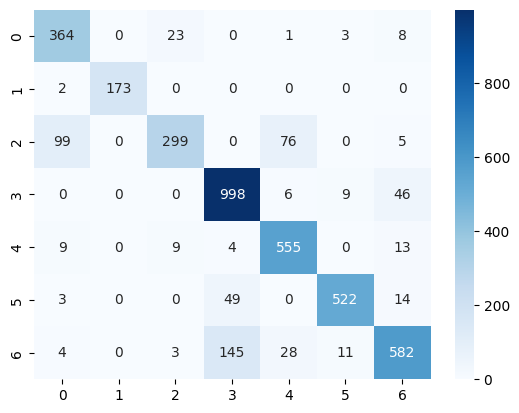

              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83       399
         1.0       1.00      0.99      0.99       175
         2.0       0.90      0.62      0.74       479
         3.0       0.83      0.94      0.89      1059
         4.0       0.83      0.94      0.88       590
         5.0       0.96      0.89      0.92       588
         6.0       0.87      0.75      0.81       773

    accuracy                           0.86      4063
   macro avg       0.88      0.86      0.87      4063
weighted avg       0.87      0.86      0.86      4063



In [1003]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
print(classification_report(y_test, y_pred))

### XGBC Classifier

In [1004]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

le = LabelEncoder()
y_encoded = le.fit_transform(y)

xgb_model = make_pipeline(StandardScaler(), XGBClassifier())

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracyXGBC = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracyXGBC*100:.2f}%")

Accuracy: 92.52%


In [1005]:
xgbc_model = make_pipeline(StandardScaler(), XGBClassifier(verbose=-1))

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(xgbc_model, X, y_encoded, cv=cv, scoring='accuracy')

average_cv_accuracy = np.mean(cv_scores)
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 92.42%


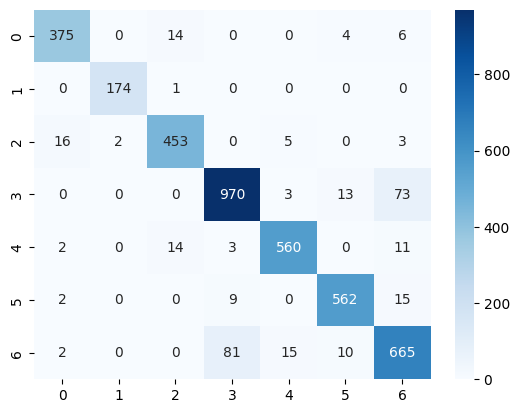

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       399
         1.0       0.99      0.99      0.99       175
         2.0       0.94      0.95      0.94       479
         3.0       0.91      0.92      0.91      1059
         4.0       0.96      0.95      0.95       590
         5.0       0.95      0.96      0.95       588
         6.0       0.86      0.86      0.86       773

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



In [1006]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

print(classification_report(y_test, y_pred))

### DECISION TREE

In [1007]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

stdscalar=StandardScaler()
X_train=stdscalar.fit_transform(X_train)
X_test=stdscalar.transform(X_test)
dtree=DecisionTreeClassifier(ccp_alpha=0, criterion='entropy',
                       min_samples_split=3, random_state=0,max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=4,
                       min_samples_split=3, random_state=0)

In [1009]:
from sklearn.metrics import accuracy_score
pred_dtree=dtree.predict(X_test)
accuracy_score(y_test,pred_dtree)

0.8584789564361309

In [1010]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dtree, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 86.17%


              precision    recall  f1-score   support

         0.0       0.78      0.68      0.72       399
         1.0       1.00      0.99      0.99       175
         2.0       0.80      0.85      0.82       479
         3.0       0.88      0.87      0.87      1059
         4.0       0.92      0.94      0.93       590
         5.0       0.95      0.92      0.94       588
         6.0       0.77      0.79      0.78       773

    accuracy                           0.86      4063
   macro avg       0.87      0.86      0.87      4063
weighted avg       0.86      0.86      0.86      4063



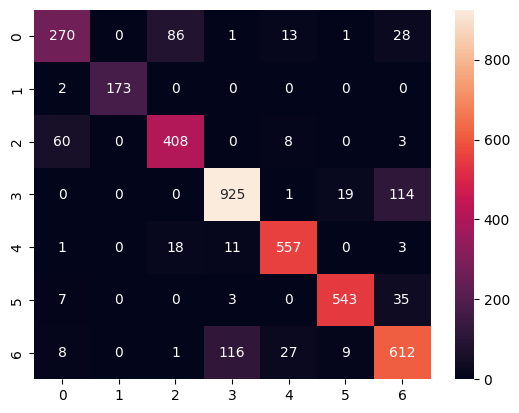

In [1011]:
from sklearn.metrics import classification_report
cm=pd.DataFrame(confusion_matrix(y_test, pred_dtree))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_dtree))
plt.show()

In [1012]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_dtree))

Mean Absolute error of decision tree 0.3758306669948314


In [143]:
# plt.figure(figsize=(15,15))
# from sklearn import tree
# tree.plot_tree(dtree)

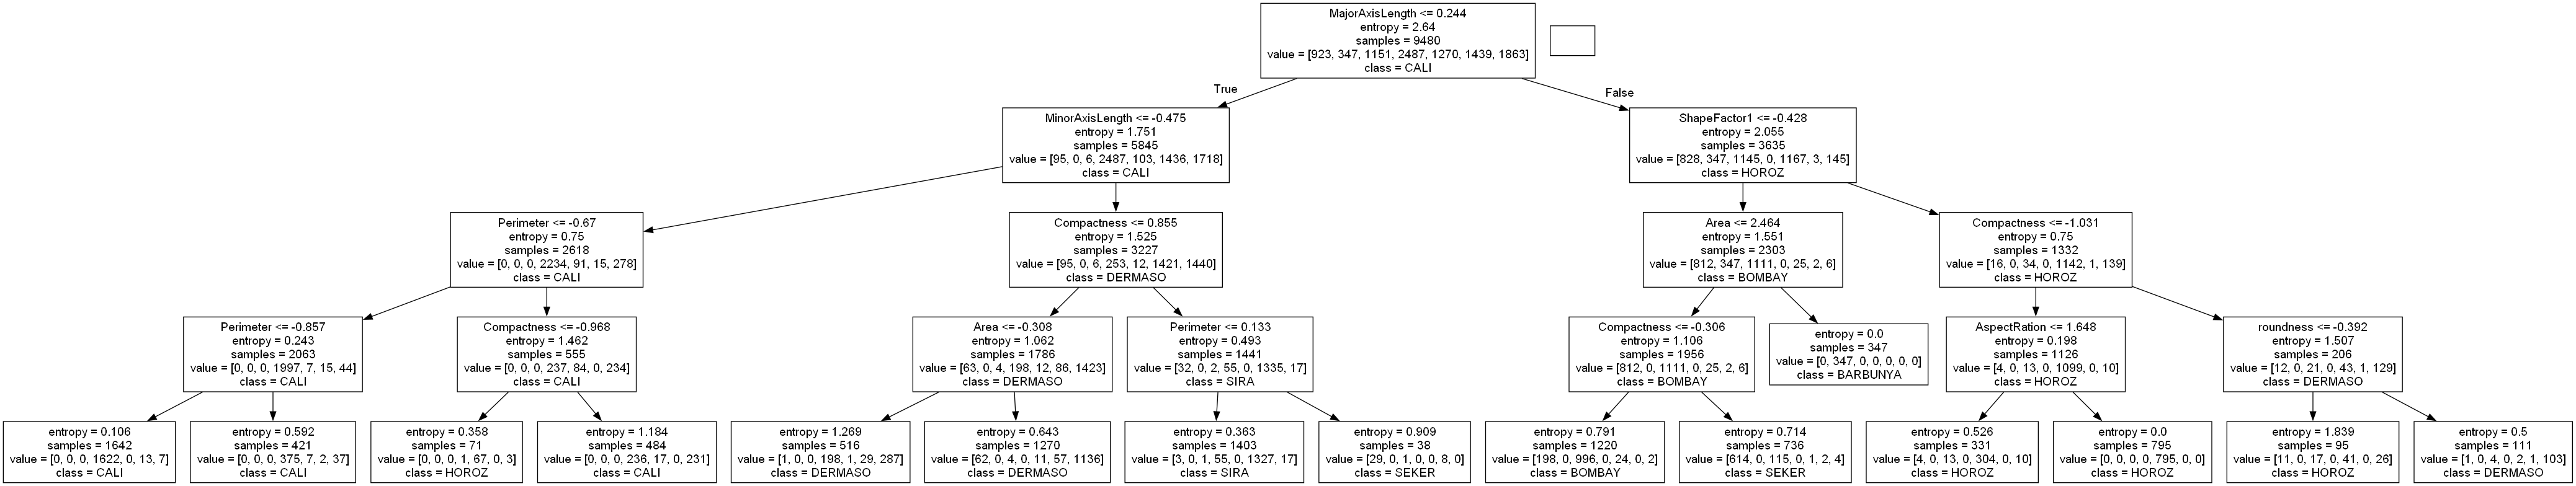

In [1013]:
import pydotplus
from sklearn import tree
from IPython.display import Image

cols = [col for col in df.columns if col not in ['Class']]
data_features = df[cols]
dot_data = tree.export_graphviz(dtree,
 out_file=None,
feature_names=data_features.columns,
 class_names=['SEKER','BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASO'])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_graphviz_executables({'dot': 'C:/Program Files/Graphviz/bin/dot.exe'})  # Putanja na Eminom racunaru

Image(graph.create_png())

### RANDOM FOREST

In [1014]:
from sklearn.ensemble import RandomForestClassifier
rfe=RandomForestClassifier()
rfeModel = rfe.fit(X_train,y_train)

In [1015]:
pred_rfe=rfe.predict(X_test)
accuracy_score(y_test,pred_rfe)

0.9232094511444745

In [1016]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfe, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 92.28%


              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       399
         1.0       1.00      0.99      1.00       175
         2.0       0.93      0.94      0.94       479
         3.0       0.91      0.92      0.92      1059
         4.0       0.96      0.94      0.95       590
         5.0       0.96      0.96      0.96       588
         6.0       0.85      0.85      0.85       773

    accuracy                           0.92      4063
   macro avg       0.94      0.93      0.94      4063
weighted avg       0.92      0.92      0.92      4063



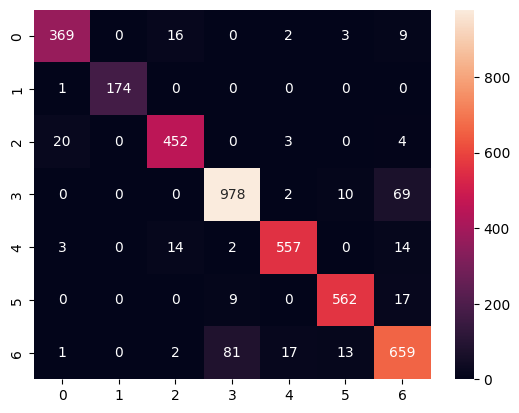

In [1017]:
con=pd.DataFrame(confusion_matrix(y_test, pred_rfe))
sns.heatmap(con, annot=True, fmt='d')
print(classification_report(y_test, pred_rfe))
plt.show()

In [1018]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_rfe))

Mean Absolute error of decision tree 0.1993600787595373


#### Optimizacija RF modela izborom relevantnih atributa

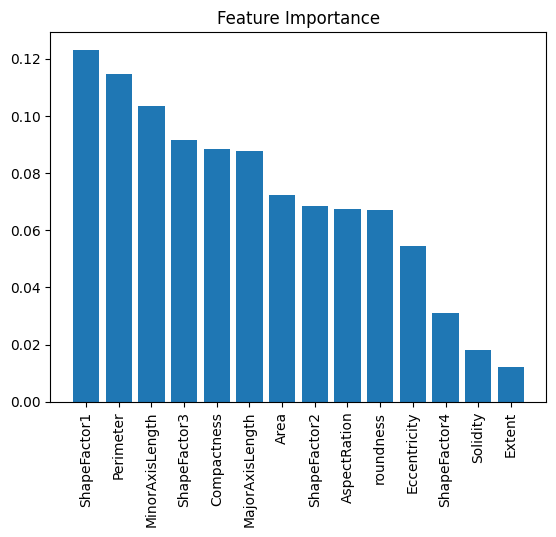

In [1019]:
importances = rfeModel.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data_features.columns[i] for i in indices]

plt.figure()

plt.title("Feature Importance")

plt.bar(range(X_train.shape[1]), importances[indices])

plt.xticks(range(X_train.shape[1]), names, rotation=90)

plt.show()

In [1020]:
from sklearn.feature_selection import SelectFromModel


def selectFeaturesRF(th):
    selector = SelectFromModel(rfe, threshold=th) 

    features_important = selector.fit_transform(X_train, y_train)

    test_important = selector.transform(X_test)

    randomForestModel = rfe.fit(features_important, y_train)

    predRFC = randomForestModel.predict(test_important)

    print("RandomForest accuracy : ",accuracy_score(y_test, predRFC, normalize = True))
    print(confusion_matrix(y_test, predRFC))
    report = classification_report(y_test,predRFC, digits=5)

    return accuracy_score(y_test, predRFC)

accRFopt = selectFeaturesRF(0.015)

RandomForest accuracy :  0.9185331036180162
[[363   0  19   0   2   5  10]
 [  2 173   0   0   0   0   0]
 [ 23   0 447   0   5   0   4]
 [  0   0   0 971   2  11  75]
 [  3   0  17   2 557   0  11]
 [  0   0   0  11   0 560  17]
 [  3   0   2  77  19  11 661]]


### SVM

In [1021]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler 

np.set_printoptions(edgeitems=127)

stdscaler=StandardScaler()  
X_train=stdscaler.fit_transform(X_train)
X_test=stdscaler.transform(X_test)

svm = SVC(C=10,kernel='rbf', gamma=0.1)
svm.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [1022]:
pred_svm=svm.predict(X_test)
print(accuracy_score(y_test,pred_svm))

0.9313315284272705


In [154]:
# from sklearn.model_selection import cross_val_score, KFold

# cv = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')
# average_cv_accuracy = cv_scores.mean()
# print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

In [1023]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_svm))

Mean Absolute error of decision tree 0.182377553531873


              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       399
         1.0       1.00      1.00      1.00       175
         2.0       0.96      0.95      0.95       479
         3.0       0.91      0.93      0.92      1059
         4.0       0.97      0.95      0.96       590
         5.0       0.97      0.96      0.96       588
         6.0       0.87      0.86      0.86       773

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



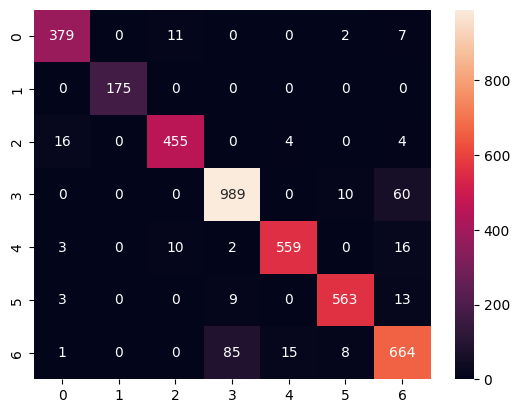

In [1024]:
cm=pd.DataFrame(confusion_matrix(y_test, pred_svm))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_svm))
plt.show()

### LOGISTIC REGRESSION

In [1025]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

lr=LogisticRegression(C=10)
stdscalar=StandardScaler()
X_train=stdscalar.fit_transform(X_train)
X_test=stdscalar.transform(X_test)

lr.fit(X_train,y_train)

LogisticRegression(C=10)

In [1028]:
pred_lr=lr.predict(X_test)
accuracy_score(y_test, pred_lr)

0.9195175978341127

In [1027]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, pred_lr))

0.2116662564607433


              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       399
         1.0       1.00      1.00      1.00       175
         2.0       0.94      0.95      0.94       479
         3.0       0.91      0.90      0.91      1059
         4.0       0.95      0.95      0.95       590
         5.0       0.96      0.94      0.95       588
         6.0       0.83      0.86      0.85       773

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



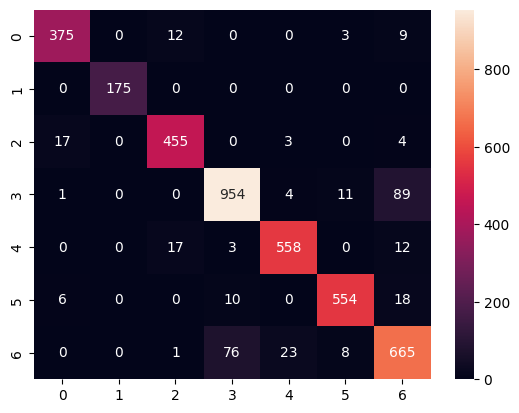

In [1029]:
cm=pd.DataFrame(confusion_matrix(y_test, pred_lr))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred_lr))
plt.show()

### NAIVE BAYES CLASSIFIER

In [1030]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [1031]:
pred_nb=gnb.predict(X_test)
accuracy_score(y_test,pred_nb)

0.8882599064730494

In [1032]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gnb, X, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 89.85%


              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       399
         1.0       1.00      0.99      0.99       175
         2.0       0.85      0.91      0.88       479
         3.0       0.92      0.86      0.89      1059
         4.0       0.94      0.95      0.94       590
         5.0       0.94      0.94      0.94       588
         6.0       0.79      0.84      0.82       773

    accuracy                           0.89      4063
   macro avg       0.90      0.90      0.90      4063
weighted avg       0.89      0.89      0.89      4063



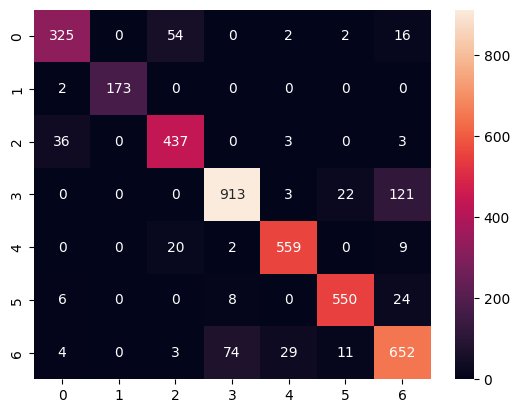

In [1033]:
conm=pd.DataFrame(confusion_matrix(y_test, pred_nb))
sns.heatmap(conm, annot=True, fmt='d')
print(classification_report(y_test, pred_nb))
plt.show()

In [1034]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, pred_nb))

Mean Absolute error of decision tree 0.29067191730248587


### KNN

In [1035]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

In [1036]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_clf_sk_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_sk_3.fit(X_train, y_train)
knn_clf_sk_3.score(X_test, y_test)

0.9158257445237509

In [1037]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_clf_sk_3, X_scaled, y, cv=cv, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Average Cross-validated Accuracy: 91.88%


KNeighbors accuracy :  0.9158257445237509
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       399
         1.0       1.00      1.00      1.00       175
         2.0       0.93      0.94      0.93       479
         3.0       0.90      0.91      0.90      1059
         4.0       0.96      0.94      0.95       590
         5.0       0.96      0.94      0.95       588
         6.0       0.84      0.84      0.84       773

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



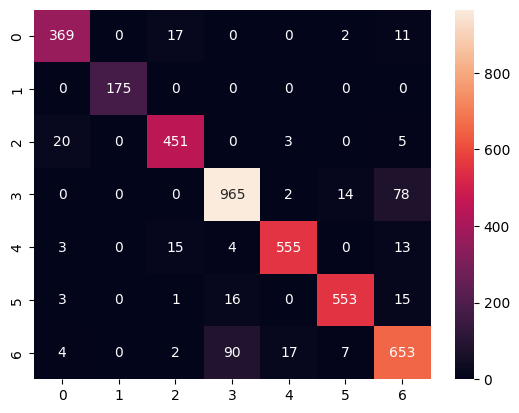

In [1038]:
nnModel = knn_clf_sk_3.fit(X_train, y_train)

predNN = nnModel.predict(X_test)

print("KNeighbors accuracy : ",accuracy_score(y_test, predNN, normalize = True))

conm=pd.DataFrame(confusion_matrix(y_test, predNN))
sns.heatmap(conm, annot=True, fmt='d')
print(classification_report(y_test, predNN))
plt.show()

In [1039]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute error of decision tree",mean_absolute_error(y_test, predNN))

Mean Absolute error of decision tree 0.2264336697021905


### Poredjenje rezultata različitih modela

In [1040]:
print('Decision tree: ',(dtree.score(X_test, y_test)*100), '%')
print('\n')
print('KNN: ',(knn_clf_sk_3.score(X_test, y_test)*100),'%')
print('\n')
print('Random Forest:', (accRFopt) * 100)
print('\n')
print('Naive Bayes Classifier: ', (gnb.score(X_test, y_test)*100),'%')
print('\n')
print('Logistic Regresion: ', (lr.score(X_test, y_test)*100),'%')
print('\n')
print('SVM: ', (svm.score(X_test, y_test)*100),'%')
print('\n')
print('LGBM: ', (accuracyLGBM*100),'%')
print('\n')
print('XGBC: ', (accuracyXGBC*100),'%')

Decision tree:  85.84789564361309 %


KNN:  91.58257445237508 %


Random Forest: 91.85331036180162


Naive Bayes Classifier:  88.82599064730495 %


Logistic Regresion:  91.95175978341126 %


SVM:  93.13315284272706 %


LGBM:  92.64090573467881 %


XGBC:  92.51784395766674 %


## UnderSampling

Prva tehnika koja je isprobana radi rešavana+ja problema nebalansiranosti dataset-a jeste undersampling pomoću Random Undersampler-a. Ova tehnika pomaže modelu da bolje generalizuje na manje zastupljene klase, čime se unapređuje njegova sposobnost predviđanja i smanjuje potencijalnu pristrasnost ka većinskoj klasi.

### Distribucija po klasama nakon undersampling-a

In [1041]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

print("Before UnderSampling, counts of 'DERMASON': {}".format(sum(y == 'DERMASON')))
print("Before UnderSampling, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before UnderSampling, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before UnderSampling, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before UnderSampling, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before UnderSampling, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before UnderSampling, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

Numeric_cols = df.drop(columns=['Class']).columns
df_resampled = pd.DataFrame(X_resampled, columns=Numeric_cols)
df_resampled["Class"] = y_resampled

print("After UnderSampling, counts of 'DERMASON': {}".format(sum(y_resampled == 'DERMASON')))
print("After UnderSampling, counts of 'SIRA': {}".format(sum(y_resampled == 'SIRA')))
print("After UnderSampling, counts of 'SEKER': {}".format(sum(y_resampled == 'SEKER')))
print("After UnderSampling, counts of 'HOROZ': {}".format(sum(y_resampled == 'HOROZ')))
print("After UnderSampling, counts of 'CALI': {}".format(sum(y_resampled == 'CALI')))
print("After UnderSampling, counts of 'BARBUNYA': {}".format(sum(y_resampled == 'BARBUNYA')))
print("After UnderSampling, counts of 'BOMBAY': {}\n".format(sum(y_resampled == 'BOMBAY')))

Before UnderSampling, counts of 'DERMASON': 3546
Before UnderSampling, counts of 'SIRA': 2636
Before UnderSampling, counts of 'SEKER': 2027
Before UnderSampling, counts of 'HOROZ': 1928
Before UnderSampling, counts of 'CALI': 1630
Before UnderSampling, counts of 'BARBUNYA': 1322
Before UnderSampling, counts of 'BOMBAY': 522

After UnderSampling, counts of 'DERMASON': 522
After UnderSampling, counts of 'SIRA': 522
After UnderSampling, counts of 'SEKER': 522
After UnderSampling, counts of 'HOROZ': 522
After UnderSampling, counts of 'CALI': 522
After UnderSampling, counts of 'BARBUNYA': 522
After UnderSampling, counts of 'BOMBAY': 522



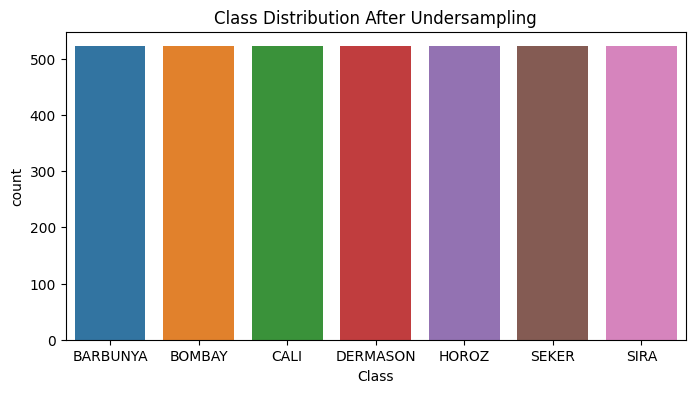

In [84]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df_resampled)
plt.title("Class Distribution After Undersampling")
plt.show()

### RF UnderSampled

In [1042]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Random forest after undersampling: {accuracy*100:.10f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

cv_scores = cross_val_score(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

Random forest after undersampling: 92.8896991796

Cross-validated Accuracy:
Fold 1: 92.07%
Fold 2: 92.20%
Fold 3: 94.53%
Fold 4: 93.57%
Fold 5: 92.05%

Average Cross-validated Accuracy: 92.88%


### DT UnderSampled

In [1043]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Decision Tree after undersampling: {accuracy*100:.10f}")
# print("Confusion Matrix:\n", conf_matrix)
# print("Classification Report:\n", class_report)

cv_scores = cross_val_score(dt_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

Decision Tree after undersampling: 89.6991795807

Cross-validated Accuracy:
Fold 1: 89.88%
Fold 2: 89.06%
Fold 3: 91.24%
Fold 4: 91.79%
Fold 5: 91.10%

Average Cross-validated Accuracy: 90.61%


In [1044]:
import pydotplus
from sklearn import tree
from IPython.display import Image

cols = [col for col in df.columns if col not in ['Class']]
data_features = df[cols]
dot_data = tree.export_graphviz(dt_classifier,
 out_file=None,
feature_names=data_features.columns,
 class_names=['SEKER','BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASO'])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_graphviz_executables({'dot': 'C:/Program Files/Graphviz/bin/dot.exe'})  # Putanja na Eminom racunaru

Image(graph.create_png())

### ADABOOST UnderSampled

In [1045]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_classifier = AdaBoostClassifier(dt_classifier, n_estimators=50, random_state=42)

adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

accuracyADA = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracyADA*100:.2f}%")

cv_scores = cross_val_score(adaboost_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")

Accuracy: 89.79%

Cross-validated Accuracy:
Fold 1: 90.29%
Fold 2: 89.19%
Fold 3: 90.97%
Fold 4: 92.20%
Fold 5: 91.51%

Average Cross-validated Accuracy: 90.83%


### LGBM UnderSampled

In [1046]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

lgbm_classifier = LGBMClassifier(random_state=42, verbose=-1)
lgbm_classifier.fit(X_train, y_train)

y_pred = lgbm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"LGBM after undersampling: {accuracy*100:.10f}")

cv_scores = cross_val_score(lgbm_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")



LGBM after undersampling: 93.1631722881

Cross-validated Accuracy:
Fold 1: 93.57%
Fold 2: 92.75%
Fold 3: 94.66%
Fold 4: 93.43%
Fold 5: 92.60%

Average Cross-validated Accuracy: 93.40%


### XGCB UnderSampled

In [1047]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Kopiranje originalnog DataFrame-a
df_original = df.copy()

# Provera jedinstvenih vrednosti pre enkodiranja
unique_classes_before = df['Class'].unique()
print("Unique classes before LabelEncoder:", unique_classes_before)

# Enkodiranje ciljne promenljive
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Provera jedinstvenih vrednosti nakon enkodiranja
unique_classes_after = df['Class'].unique()
print("Unique classes after LabelEncoder:", unique_classes_after)

# Definisanje trening i test podataka
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kreiranje i treniranje modela
xgboost_classifier = XGBClassifier(random_state=42, verbosity=0)
xgboost_classifier.fit(X_train, y_train)

# Predviđanja i evaluacija
y_pred = xgboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"XGBoost after undersampling: {accuracy*100:.10f}")

# Cross-validacija sa StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgboost_classifier, X, y, cv=cv, scoring='accuracy')

print("\nCross-validated Accuracy:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score*100:.2f}%")

average_cv_accuracy = cv_scores.mean()
print(f"\nAverage Cross-validated Accuracy: {average_cv_accuracy*100:.2f}%")


Unique classes before LabelEncoder: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
Unique classes after LabelEncoder: [5 0 1 2 4 6 3]
XGBoost after undersampling: 92.3980903415

Cross-validated Accuracy:
Fold 1: 92.07%
Fold 2: 93.06%
Fold 3: 92.80%
Fold 4: 93.09%
Fold 5: 92.51%

Average Cross-validated Accuracy: 92.70%


## SMOTE OverSampling

Druga tehnika koja je isprobana za rešavanje problema nebalansiranosti dataset-a je SMOTE (Synthetic Minority Over-sampling Technique) Oversampling. Ova tehnika generiše sintetičke instance manje zastupljenih klasi, čime se povećava broj tih instanci i postiže ravnoteža među klasama. SMOTE Oversampling pomaže modelu da bolje nauči karakteristike manje zastupljenih klasa, poboljšavajući time njegovu sposobnost predviđanja i smanjujući potencijalnu pristrasnost ka većinskoj klasi.

### Distribucija po klasama nakon oversampling-a

In [1048]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

print("Before OverSampling, counts of 'DERMASON': {}".format(sum(y == 'DERMASON')))
print("Before OverSampling, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before OverSampling, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before OverSampling, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before OverSampling, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before OverSampling, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before OverSampling, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

print("After OverSampling, counts of 'DERMASON': {}".format(sum(y_res == 'DERMASON')))
print("After OverSampling, counts of 'SIRA': {}".format(sum(y_res == 'SIRA')))
print("After OverSampling, counts of 'SEKER': {}".format(sum(y_res == 'SEKER')))
print("After OverSampling, counts of 'HOROZ': {}".format(sum(y_res == 'HOROZ')))
print("After OverSampling, counts of 'CALI': {}".format(sum(y_res == 'CALI')))
print("After OverSampling, counts of 'BARBUNYA': {}".format(sum(y_res == 'BARBUNYA')))
print("After OverSampling, counts of 'BOMBAY': {}\n".format(sum(y_res == 'BOMBAY')))

Before OverSampling, counts of 'DERMASON': 3546
Before OverSampling, counts of 'SIRA': 2636
Before OverSampling, counts of 'SEKER': 2027
Before OverSampling, counts of 'HOROZ': 1928
Before OverSampling, counts of 'CALI': 1630
Before OverSampling, counts of 'BARBUNYA': 1322
Before OverSampling, counts of 'BOMBAY': 522

After OverSampling, counts of 'DERMASON': 3546
After OverSampling, counts of 'SIRA': 3546
After OverSampling, counts of 'SEKER': 3546
After OverSampling, counts of 'HOROZ': 3546
After OverSampling, counts of 'CALI': 3546
After OverSampling, counts of 'BARBUNYA': 3546
After OverSampling, counts of 'BOMBAY': 3546



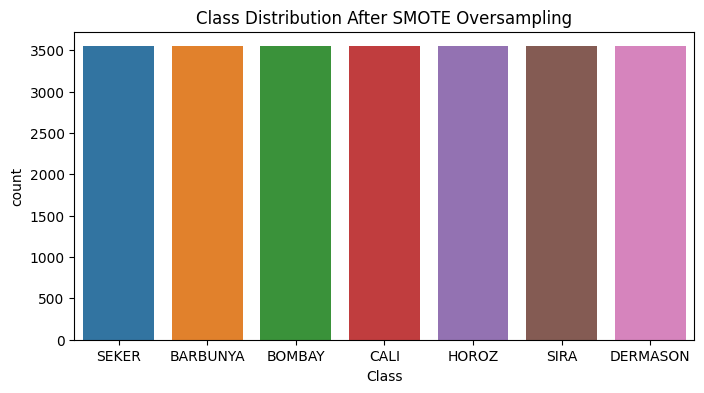

In [181]:
import seaborn as sns

Numeric_cols = df.drop(columns=['Class']).columns
df_resampled = pd.DataFrame(X_res, columns=Numeric_cols)
df_resampled["Class"] = y_res

plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df_resampled)
plt.title("Class Distribution After SMOTE Oversampling")
plt.show()

In [1049]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Class', axis=1)
y = df['Class']

scaler = MinMaxScaler()

columns_to_scale =  df.columns[:-1]

scaler.fit(df[columns_to_scale])

df[columns_to_scale] = scaler.transform(df[columns_to_scale])

### RF OverSampled

In [1050]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_excel('Dry_Bean_Dataset.xlsx')
x_data = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

rf_selected = RandomForestClassifier()
rf_selected.fit(X_train, y_train)

cv_scores = cross_val_score(rf_selected, X_train, y_train, cv=7)  

accuracy = rf_selected.score(X_test, y_test)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged = np.concatenate((X_train, X_test), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

cv_scores = cross_val_score(rf_selected, X_merged, y_merged, cv=5) 
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 95.17%
Cross-validated Accuracy: 95.30%


### DT OverSampled

In [1051]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged_df = np.concatenate((X_train, X_test), axis=0) #pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = np.concatenate((y_train, y_test), axis=0) #pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(dt_model, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 93.04%
Cross-validated Accuracy: 93.07%


### LGBM OverSampled

In [1052]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

lgbm_model = LGBMClassifier(verbose=-1)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

X_merged = np.concatenate((X_train, X_test), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

cv_scores = cross_val_score(lgbm_model, X_merged, y_merged, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)


Accuracy (without cross-validation): 95.29%
Cross-validated Accuracy: 95.58%


### XGBM OverSampled

In [1053]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

X = df.drop('Class', axis=1)
y = df['Class']

sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

X_merged = np.concatenate((X_train, X_test), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

cv_scores = cross_val_score(xgb_model, X_merged, y_merged, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 95.45%
Cross-validated Accuracy: 95.61%


## SMOTEENN

Konačno, kao poslednju tehniku za prevazilaženje problema nebalansiranosti u dataset-u, primenjena je SMOTE-ENN (Synthetic Minority Over-sampling Technique with Edited Nearest Neighbors) kombinovana tehnika. Ova metoda integriše SMOTE oversampling za generisanje sintetičkih instanci manje zastupljenih klasa, uz istovremenu primenu ENN (Edited Nearest Neighbors) tehnike za uklanjanje potencijalno problematičnih instanci. Korišćenjem SMOTE-ENN-a, cilj je poboljšanje sposobnosti modela da se nosi s nebalansiranim podacima, smanjenje potencijalne pristrasnosti i unapredjenje generalizacije za manje zastupljene klase.

### Distribucija po klasama nakon SMOTEENN

In [1054]:
import pandas as pd
from imblearn.combine import SMOTEENN  
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = df.drop('Class', axis=1)
y = df['Class']

print("Before SMOTEENN, counts of 'DERMASON': {}".format(sum(y == 'DERMASON')))
print("Before SMOTEENN, counts of 'SIRA': {}".format(sum(y == 'SIRA')))
print("Before SMOTEENN, counts of 'SEKER': {}".format(sum(y == 'SEKER')))
print("Before SMOTEENN, counts of 'HOROZ': {}".format(sum(y == 'HOROZ')))
print("Before SMOTEENN, counts of 'CALI': {}".format(sum(y == 'CALI')))
print("Before SMOTEENN, counts of 'BARBUNYA': {}".format(sum(y == 'BARBUNYA')))
print("Before SMOTEENN, counts of 'BOMBAY': {}\n".format(sum(y == 'BOMBAY')))

sm = SMOTEENN(random_state=2)  
X_res, y_res = sm.fit_resample(X, y.ravel())

print("After SMOTEENN, counts of 'DERMASON': {}".format(sum(y_res == 'DERMASON')))
print("After SMOTEENN, counts of 'SIRA': {}".format(sum(y_res == 'SIRA')))
print("After SMOTEENN, counts of 'SEKER': {}".format(sum(y_res == 'SEKER')))
print("After SMOTEENN, counts of 'HOROZ': {}".format(sum(y_res == 'HOROZ')))
print("After SMOTEENN, counts of 'CALI': {}".format(sum(y_res == 'CALI')))
print("After SMOTEENN, counts of 'BARBUNYA': {}".format(sum(y_res == 'BARBUNYA')))
print("After SMOTEENN, counts of 'BOMBAY': {}\n".format(sum(y_res == 'BOMBAY')))

Before SMOTEENN, counts of 'DERMASON': 3546
Before SMOTEENN, counts of 'SIRA': 2636
Before SMOTEENN, counts of 'SEKER': 2027
Before SMOTEENN, counts of 'HOROZ': 1928
Before SMOTEENN, counts of 'CALI': 1630
Before SMOTEENN, counts of 'BARBUNYA': 1322
Before SMOTEENN, counts of 'BOMBAY': 522

After SMOTEENN, counts of 'DERMASON': 2489
After SMOTEENN, counts of 'SIRA': 2098
After SMOTEENN, counts of 'SEKER': 2462
After SMOTEENN, counts of 'HOROZ': 2465
After SMOTEENN, counts of 'CALI': 2216
After SMOTEENN, counts of 'BARBUNYA': 2179
After SMOTEENN, counts of 'BOMBAY': 3541



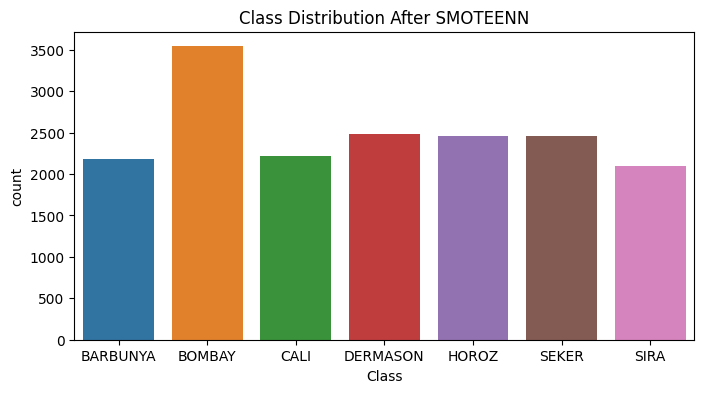

In [1055]:
import seaborn as sns

Numeric_cols = df.drop(columns=['Class']).columns
df_resampled = pd.DataFrame(X_res, columns=Numeric_cols)
df_resampled["Class"] = y_res

plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df_resampled)
plt.title("Class Distribution After SMOTEENN")
plt.show()

### RF SMOTEENN

In [1056]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

rf_selected = RandomForestClassifier()
rf_selected.fit(X_train, y_train)

cv_scores = cross_val_score(rf_selected, X_train, y_train, cv=7)  

accuracy = rf_selected.score(X_test, y_test)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged = np.concatenate((X_train, X_test), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

cv_scores = cross_val_score(rf_selected, X_merged, y_merged, cv=5) 
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 98.93%
Cross-validated Accuracy: 99.21%


### DT SMOTEENN

In [1057]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

#X_merged_df = X_train.append(X_test)
#y_merged_df = y_train.append(y_test)

X_merged_df = np.concatenate((X_train, X_test), axis=0) #pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = np.concatenate((y_train, y_test), axis=0) #pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(dt_model, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 98.30%
Cross-validated Accuracy: 98.72%


### LGBM SMOTEENN

In [1058]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

lgbm_model = LGBMClassifier(verbose=-1)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

X_merged = np.concatenate((X_train, X_test), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

cv_scores = cross_val_score(lgbm_model, X_merged, y_merged, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 99.05%
Cross-validated Accuracy: 99.40%


### XGBM SMOTEENN

In [1059]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

X = df.drop('Class', axis=1)
y = df['Class']

sm = SMOTEENN(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = format(accuracy, '.2%')
print("Accuracy (without cross-validation):", formatted_accuracy)

X_merged = np.concatenate((X_train, X_test), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

cv_scores = cross_val_score(xgb_model, X_merged, y_merged, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy (without cross-validation): 99.04%
Cross-validated Accuracy: 99.38%


## Podešavanje hiperparametara

### DT 

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#param = {
#    'criterion': ['gini'],
#    'max_depth': [i for i in range(20, 101, 10)], # [30, 50, 60, 100]
#    'min_samples_leaf': [i for i in range(2, 11, 1)], # [2, 3, 5, 10]
#    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5] # [0.1, 0.2, 0.5]
#}

param = {'max_depth': [3, 5, 7, 9, 12, 15, 17], 'min_samples_leaf': [10, 50, 100, 150, 250, 300]}
# param = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [i for i in range(3, 10)],
#     'min_samples_leaf': [i for i in range(1, 6)],
#     'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5]
# }
#grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6) # default scoring: accuracy_score
gridDT= GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=5)
gridDT.fit(X_train, y_train)
print('\n Best DT Classifier:', gridDT.best_params_, '\n\Best Score:', gridDT.best_score_)  


 Best DT Classifier: {'max_depth': 9, 'min_samples_leaf': 10} 
\Best Score: 0.9343884892086332


### RF

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param = {'max_depth': [15, 17, 20], 'min_samples_leaf': [10],
     'n_estimators': [100, 200, 300]}

grid= GridSearchCV(RandomForestClassifier(), param_grid=param, cv=5)
grid.fit(X_train, y_train)
print('\n Best RF Classifier:', grid.best_params_, '\n\Best Score:', grid.best_score_)  


 Best RF Classifier: {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 300} 
\Best Score: 0.9429064748201439


### KNN

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform, randint

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)


print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))

Best Hyperparameters:  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Best Accuracy: 94.84%


### LR

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()

param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(0.1, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': randint(50, 200),
    'multi_class':['ovr', 'multinomial']
}

random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))

Best Hyperparameters:  {'C': 0.30584494295802445, 'max_iter': 51, 'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'lbfgs'}
Best Accuracy: 94.39%


## Selekcija fičera / redukcija

### PCA

Principle Component Analysis (PCA) koristi se kao tehnika redukcije dimenzionalnosti problema i posebno je pogodna za probleme sa velikim brojem dimenzija.
Dataset za ovaj projekat ima 16 dimenzija, što nije preveliki broj, ali vredi pokušati sa smanjenjem dimenzija iz eksperimentalnih razloga, kako bi se posmatralo ponašanje isprobanih modela.

In [195]:
from sklearn import decomposition
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


pca = decomposition.PCA()

def PCA_selection(model,modelName,test=False):
    pipe = Pipeline(steps=[('pca', pca),
                           ('model', model)])
    model = pipe.fit(X_train,y_train)
    prediction = model.predict(X_test)
    print(f"Best {modelName} accuracy : ",accuracy_score(y_test, prediction, normalize = True))
    # if(test):
    #     print(model[1].n_features_in_)

#svc = SVC()
decisionTree = DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 10)     
#knn=KNeighborsClassifier(algorithm ='auto', n_neighbors= 4, p= 2, weights = 'distance')
randomForest = RandomForestClassifier(max_depth = 15, min_samples_leaf = 10, n_estimators = 300)


PCA_selection(randomForest,"RForest")
#PCA_selection(knn,"KNN", True)
PCA_selection(decisionTree,"DTree")

Best RForest accuracy :  0.9503155633140862
Best DTree accuracy :  0.9337988451725527


### Variance Threshold

Variance Threshold algoritam koristi varijansu nekog atributa kako bi se izbacili atributi sa varijansom manjom od specificirane. 
Ideja je da podaci koji manje variraju imaju i manji značaj pri klasifikaciji nekog uzorka.

In [204]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

X = df.drop('Class', axis=1)
y = df['Class']

pd.set_option('display.float_format', '{:.6f}'.format)
print("Variance of each feature in the original dataset:")
print(X.var())
pd.set_option('display.float_format', None)

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X, y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

variance_threshold = 0.001  
variance_selector = VarianceThreshold(threshold=variance_threshold)

X_train_variance = variance_selector.fit_transform(X_train)
X_test_variance = variance_selector.transform(X_test)

X_merged_variance = np.concatenate((X_train_variance, X_test_variance), axis=0)
y_merged_variance = np.concatenate((y_train, y_test), axis=0)

Variance of each feature in the original dataset:
Area              859902589.612854
Perimeter             45920.073765
MajorAxisLength        7343.493507
MinorAxisLength        2022.309111
AspectRation              0.060850
Eccentricity              0.008464
ConvexArea        886545611.909437
EquivDiameter          3501.931549
Extent                    0.002409
Solidity                  0.000022
roundness                 0.003543
Compactness               0.003809
ShapeFactor1              0.000001
ShapeFactor2              0.000000
ShapeFactor3              0.009800
ShapeFactor4              0.000019
dtype: float64


In [205]:
xgb_model_variance = XGBClassifier()
xgb_model_variance.fit(X_train_variance, y_train)

y_pred_variance = xgb_model_variance.predict(X_test_variance)
accuracy_variance = accuracy_score(y_test, y_pred_variance)
formatted_accuracy_variance = format(accuracy_variance, '.2%')
print("Accuracy with VarianceThreshold:", formatted_accuracy_variance)

cv_scores_variance = cross_val_score(xgb_model_variance, X_merged_variance, y_merged_variance, cv=5)  
average_accuracy_variance = cv_scores_variance.mean()
formatted_cv_accuracy_variance = format(average_accuracy_variance, '.2%')
print("Cross-validated Accuracy with VarianceThreshold:", formatted_cv_accuracy_variance)

Accuracy with VarianceThreshold: 94.66%
Cross-validated Accuracy with VarianceThreshold: 94.70%


In [206]:
lgbm_model_variance = LGBMClassifier()
lgbm_model_variance.fit(X_train_variance, y_train)

y_pred_variance = lgbm_model_variance.predict(X_test_variance)
accuracy_variance = accuracy_score(y_test, y_pred_variance)
formatted_accuracy_variance = format(accuracy_variance, '.2%')
print("\nAccuracy with VarianceThreshold:", formatted_accuracy_variance)

cv_scores_variance = cross_val_score(lgbm_model_variance, np.concatenate((X_train_variance, X_test_variance), axis=0),
                                    np.concatenate((y_train, y_test), axis=0), cv=5)  
average_accuracy_variance = cv_scores_variance.mean()
formatted_cv_accuracy_variance = format(average_accuracy_variance, '.2%')
print("Cross-validated Accuracy with VarianceThreshold:", formatted_cv_accuracy_variance)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 17375, number of used features: 12
[LightGBM] [Info] Start training from score -1.954871
[LightGBM] [Info] Start training from score -1.949196
[LightGBM] [Info] Start training from score -1.947984
[LightGBM] [Info] Start training from score -1.946774
[LightGBM] [Info] Start training from score -1.941145
[LightGBM] [Info] Start training from score -1.927208
[LightGBM] [Info] Start training from score -1.954465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Accuracy with VarianceThreshold: 94.72%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Num

In [207]:
rf_model_variance = RandomForestClassifier()
rf_model_variance.fit(X_train_variance, y_train)

y_pred_variance = rf_model_variance.predict(X_test_variance)
accuracy_variance = accuracy_score(y_test, y_pred_variance)
formatted_accuracy_variance = format(accuracy_variance, '.2%')
print("\nAccuracy with VarianceThreshold:", formatted_accuracy_variance)

cv_scores_variance = cross_val_score(rf_model_variance, np.concatenate((X_train_variance, X_test_variance), axis=0),
                                    np.concatenate((y_train, y_test), axis=0), cv=5)  
average_accuracy_variance = cv_scores_variance.mean()
formatted_cv_accuracy_variance = format(average_accuracy_variance, '.2%')
print("Cross-validated Accuracy with VarianceThreshold:", formatted_cv_accuracy_variance)


Accuracy with VarianceThreshold: 94.16%
Cross-validated Accuracy with VarianceThreshold: 94.57%


In [208]:
dt_model_variance = DecisionTreeClassifier()
dt_model_variance.fit(X_train_variance, y_train)

y_pred_variance = dt_model_variance.predict(X_test_variance)
accuracy_variance = accuracy_score(y_test, y_pred_variance)
formatted_accuracy_variance = format(accuracy_variance, '.2%')
print("\nAccuracy with VarianceThreshold:", formatted_accuracy_variance)

cv_scores_variance = cross_val_score(dt_model_variance, np.concatenate((X_train_variance, X_test_variance), axis=0),
                                    np.concatenate((y_train, y_test), axis=0), cv=5)  
average_accuracy_variance = cv_scores_variance.mean()
formatted_cv_accuracy_variance = format(average_accuracy_variance, '.2%')
print("Cross-validated Accuracy with VarianceThreshold:", formatted_cv_accuracy_variance)


Accuracy with VarianceThreshold: 91.90%
Cross-validated Accuracy with VarianceThreshold: 92.08%


### Highly Correlated Matrix Feature Reduction

Kada su u pitanju podaci sa visokim nivoom korelacije, korisno je upotrebiti redukciju dimenzionalnosti na osnovu matrice korelacije.

In [212]:
corr_matrix = data_features.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Highly Correlated Features:")
for column in to_drop:
    correlated_with = list(upper.index[upper[column] > 0.95])
    print(f"{column} is highly correlated with: {correlated_with}")

data_features_HCF = data_features.drop(data_features[to_drop], axis=1)

print("\nReduced Feature Matrix after dropping highly correlated features:")
data_features_HCF.head(3)

Highly Correlated Features:
Perimeter is highly correlated with: ['Area']
MajorAxisLength is highly correlated with: ['Perimeter']
MinorAxisLength is highly correlated with: ['Area']
ConvexArea is highly correlated with: ['Area', 'Perimeter', 'MinorAxisLength']
EquivDiameter is highly correlated with: ['Area', 'Perimeter', 'MajorAxisLength', 'ConvexArea']
Compactness is highly correlated with: ['AspectRation', 'Eccentricity']
ShapeFactor3 is highly correlated with: ['AspectRation', 'Eccentricity', 'Compactness']

Reduced Feature Matrix after dropping highly correlated features:


Area  AspectRation  Eccentricity  Extent  Solidity  roundness  \
0  28395          1.20          0.55    0.76      0.99       0.96   
1  28734          1.10          0.41    0.78      0.98       0.89   
2  29380          1.21          0.56    0.78      0.99       0.95   

   ShapeFactor1  ShapeFactor2  ShapeFactor4  
0      7.33e-03      3.15e-03           1.0  
1      6.98e-03      3.56e-03           1.0  
2      7.24e-03      3.05e-03           1.0

In [213]:
X_train, X_test, y_train, y_test = train_test_split(data_features_HCF, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

cross_val_scores = cross_val_score(model, data_features_HCF, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)

Accuracy: 0.9226248775710089
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       395
           1       1.00      1.00      1.00       161
           2       0.93      0.94      0.94       479
           3       0.90      0.92      0.91      1043
           4       0.96      0.95      0.96       588
           5       0.95      0.94      0.94       619
           6       0.87      0.87      0.87       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.92      0.92      0.92      4084

Cross-Validation Scores: [0.52111642 0.79647318 0.95003674 0.71050698 0.38721528]


### Recursive Feature Elimination

RFE algoritam koristi rekurzivno smanjivanje atributa dataset-a kako bi poboljšao performanse modela.
Ovaj algoritam ima smisla primenjivati samo kod Decision Tree i Random Forest modela.

#### DT

In [103]:
from sklearn.feature_selection import RFE

rfeDT = RFE(estimator=dt_classifier)
rfeDT_model = rfeDT.fit(X_train, y_train)
rfeDT_pred = rfeDT_model.predict(X_test)
print("Best number of features in DecisionTree: ",rfeDT.n_features_)
print("Accuracy : ",accuracy_score(y_test, rfeDT_pred, normalize = True))

Best number of features in DecisionTree:  8
Accuracy :  0.929636095071841


#### RF

In [104]:
rfeRF = RFE(estimator=rf_classifier)
rfeRF_model = rfeRF.fit(X_train, y_train)
rfeRF_pred= rfeRF_model.predict(X_test)
print("Best number of features in RandomForest: ",rfeRF.n_features_)
print("Accuracy : ",accuracy_score(y_test, rfeRF_pred, normalize = True))

Best number of features in RandomForest:  8
Accuracy :  0.9370216194440715


#### Odredjivanje broja atributa koji daju najbolju tacnost

In [ ]:
def get_RFE_Features(estimator,numFeatures,modelName):
    rfe = RFE(estimator=estimator, n_features_to_select=numFeatures)
    rfe_model = rfe.fit(X_train, y_train)
    rfe_pred= rfe_model.predict(X_test)
    print(f" Number of features in {modelName} : ",rfe.n_features_)
    print("Accuracy : ",accuracy_score(y_test, rfe_pred, normalize = True))

In [ ]:
for x in range(1,14):
    get_RFE_Features(dt_classifier,x,"DTree")

 Number of features in DTree :  1
Accuracy :  0.5183295286692627
 Number of features in DTree :  2
Accuracy :  0.8590036256210555
 Number of features in DTree :  3
Accuracy :  0.8655834564254062
 Number of features in DTree :  4
Accuracy :  0.9127165301463677
 Number of features in DTree :  5
Accuracy :  0.9180878205988989
 Number of features in DTree :  6
Accuracy :  0.9292332482879012
 Number of features in DTree :  7
Accuracy :  0.932993151604673
 Number of features in DTree :  8
Accuracy :  0.934873103263059
 Number of features in DTree :  9
Accuracy :  0.9343359742178058
 Number of features in DTree :  10
Accuracy :  0.9332617161272996
 Number of features in DTree :  11
Accuracy :  0.9354102323083121
 Number of features in DTree :  12
Accuracy :  0.9331274338659863
 Number of features in DTree :  13
Accuracy :  0.9337988451725527


In [ ]:
for x in range(1,14):
    get_RFE_Features(rf_classifier,x,"RForest")

 Number of features in RForest :  1
Accuracy :  0.5284006982677588
 Number of features in RForest :  2
Accuracy :  0.8902913925070498
 Number of features in RForest :  3
Accuracy :  0.9323217402981067
 Number of features in RForest :  4
Accuracy :  0.9347388210017457
 Number of features in RForest :  5
Accuracy :  0.931113199946287
 Number of features in RForest :  6
Accuracy :  0.9340674096951793
 Number of features in RForest :  7
Accuracy :  0.9328588693433597
 Number of features in RForest :  8
Accuracy :  0.9379615952732644
 Number of features in RForest :  9
Accuracy :  0.9383644420572043
 Number of features in RForest :  10
Accuracy :  0.9380958775345777
 Number of features in RForest :  11
Accuracy :  0.9378273130119511
 Number of features in RForest :  12
Accuracy :  0.9464213777360011
 Number of features in RForest :  13
Accuracy :  0.9508526923593393


### Lasso

Lasso predstavlja model regresije koji se može koristiti za efikasno smanjenje broja relevantnih atributa.
Ako neki deo modela nije važan za predviđanje, Lasso će pokušati postaviti odgovarajući koeficijent na nulu, eliminisajući time taj dio iz konačnog modela

In [ ]:
from sklearn.calibration import LinearSVC


lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,random_state=0).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
data_train_Lasso = model.transform(X_train)
data_test_Lasso = model.transform(X_test)
print("New number of features: ",data_train_Lasso.shape[1])
print("Feature coefficients: \n",model.estimator.coef_)

def get_Lasso_score(estimator,modelName):
    model = estimator.fit(data_train_Lasso, y_train)
    pred = model.predict(data_test_Lasso)
    print(f"Best {modelName} accuracy : ",accuracy_score(y_test, pred, normalize = True))


New number of features:  8
Feature coefficients: 
 [[-6.42311094e-06  4.76149413e-03 -1.92494656e-02  2.52472778e-02
   2.74406770e-01  1.66664744e+00  0.00000000e+00  0.00000000e+00
  -6.02855726e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.05559114e-05  2.69686597e-03  1.57822425e-02 -2.20518596e-02
  -2.56367478e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00087370e-04 -6.91943951e-03 -7.56778883e-03  6.35651960e-03
   1.01467059e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.69552918e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.07483140e+00  0.00000000e+00]
 [-1.50108269e-04 -7.86668282e-04  3.55528730e-03  3.09233395e-03
   0.00000000e+00  4.59287263e+00  0.00000000e+00  0.00000000e+00
   1.26201868e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.52150876e-05

In [ ]:
get_Lasso_score(dt_classifier,"Decision Tree")

Best Decision Tree accuracy :  0.9201020545185981


In [ ]:
get_Lasso_score(rf_classifier,"Random Forest")

Best Random Forest accuracy :  0.9401101114542769


## Dodatne Ensemble metode

### Bagging 

Kod Bagging metode, kombinuje se više modela iste vrste kako bi se došlo do klasifikacije. Isproban je BaggingClassifier na DT:

In [80]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(dt_classifier,n_jobs=-1,n_estimators=10,random_state=0)
bagging_model = bagging.fit(X_train, y_train)
bagging_predict = bagging_model.predict(X_test)

print("Best Bagging accuracy : ",accuracy_score(y_test, bagging_predict, normalize = True))
print(confusion_matrix(y_test, bagging_predict))

Best Bagging accuracy :  0.9343664539653601
[[160   0   9   1   1   1   4]
 [  0 162   0   0   0   0   0]
 [  7   0 147   0   0   2   0]
 [  0   0   0 140   0   4   8]
 [  3   0   4   0 140   0   3]
 [  0   0   0   2   0 132   5]
 [  1   0   1  12   0   4 144]]


In [83]:
X_merged_df = np.concatenate((X_train, X_test), axis=0) #pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = np.concatenate((y_train, y_test), axis=0) #pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(bagging, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Cross-validated Accuracy: 92.23%


### Boosting (jos metoda pored AdaBoost i XGBoost)

#### GradientBoosting Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier 

gradboost = GradientBoostingClassifier(n_estimators=100)
gradboost_model = gradboost.fit(X_train, y_train)
gradboost_pred = gradboost_model.predict(X_test)

print("GradientBoost accuracy : ",accuracy_score(y_test, gradboost_pred, normalize = True))
print(confusion_matrix(y_test, gradboost_pred))

GradientBoost accuracy :  0.9334548769371012
[[162   0   8   0   1   1   4]
 [  0 162   0   0   0   0   0]
 [  5   0 149   0   0   1   1]
 [  0   0   0 135   1   3  13]
 [  1   0   5   0 141   0   3]
 [  1   0   0   2   0 133   3]
 [  1   0   1  13   2   3 142]]


In [87]:
X_merged_df = np.concatenate((X_train, X_test), axis=0) #pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = np.concatenate((y_train, y_test), axis=0) #pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(gradboost, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Cross-validated Accuracy: 92.91%


#### HistGradientBoostring Classifier

In [90]:
from sklearn.ensemble import HistGradientBoostingClassifier

histGradBoost = HistGradientBoostingClassifier(max_iter=100)
histGradBoost_Model = histGradBoost.fit(X_train, y_train)
histGradBoost_pred = histGradBoost_Model.predict(X_test)

print("HistogramGradientBoost accuracy : ",accuracy_score(y_test, histGradBoost_pred, normalize = True))
print(confusion_matrix(y_test, histGradBoost_pred))

HistogramGradientBoost accuracy :  0.9343664539653601
[[161   0  10   0   1   1   3]
 [  0 162   0   0   0   0   0]
 [  3   1 150   0   0   1   1]
 [  0   0   0 136   0   3  13]
 [  1   0   4   0 142   0   3]
 [  0   0   0   2   0 134   3]
 [  1   0   1  15   2   3 140]]


In [91]:
X_merged_df = np.concatenate((X_train, X_test), axis=0) #pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = np.concatenate((y_train, y_test), axis=0) #pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(histGradBoost, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Cross-validated Accuracy: 92.83%


### Voting

Voting je tehnika kojom se kombinuje više raznovrsnih klasifikatora koji zajedno "glasaju" o konačnom rezultatu klasifikacije.
Kombinovani su Decision Tree i Random Forest.

In [93]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[('dt',dt_classifier),('rf',rf_classifier)], voting='hard')

votingClassifier_model = voting_classifier.fit(X_train, y_train)
votingClassifier_pred = votingClassifier_model.predict(X_test)

print("VotingClassifier accuracy : ",accuracy_score(y_test, votingClassifier_pred, normalize = True))
print(confusion_matrix(y_test, votingClassifier_pred))

VotingClassifier accuracy :  0.9079307201458523
[[161   0   9   0   1   1   4]
 [  0 162   0   0   0   0   0]
 [ 16   0 138   0   0   2   0]
 [  0   0   0 140   0   5   7]
 [  3   0   5   0 139   0   3]
 [  0   0   0   3   0 132   4]
 [  1   0   3  22   3   9 124]]


In [94]:
X_merged_df = np.concatenate((X_train, X_test), axis=0) #pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = np.concatenate((y_train, y_test), axis=0) #pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(voting_classifier, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Cross-validated Accuracy: 91.43%


In [ ]:
def getAccuracy(model,modelName):
    modelTrained = model.fit(X_train, y_train)
    prediction = modelTrained.predict(X_test)
    print(f"{modelName} accuracy : ",accuracy_score(y_test, prediction, normalize = True))

getAccuracy(dt_classifier,"DTree")
getAccuracy(rf_classifier,"RForest")

DTree accuracy :  0.9309789176849738
RForest accuracy :  0.9499127165301464


### Stacking

Stacking tehnika kombinuje više klasifikatora tako što se dataset deli u više delova i svaki klasifikator se trenira posebno na delovima dataset-a. Rezultat fittovanja svakog klasifikatora se koristi da se napravi konačni model klasifikacije.

In [95]:
from sklearn.ensemble import StackingClassifier

stacking_classifier = StackingClassifier(estimators=[('dt',dt_classifier),('rf',rf_classifier)])

stackingClassifier_model = stacking_classifier.fit(X_train, y_train)
stackingClassifier_pred = stackingClassifier_model.predict(X_test)

print("StackingClassifier accuracy : ",accuracy_score(y_test, stackingClassifier_pred, normalize = True))
print(confusion_matrix(y_test, stackingClassifier_pred))

StackingClassifier accuracy :  0.927073837739289
[[158   0  11   0   1   2   4]
 [  0 162   0   0   0   0   0]
 [  3   0 151   0   0   2   0]
 [  0   0   0 134   0   5  13]
 [  1   0   4   0 142   0   3]
 [  0   0   0   2   0 133   4]
 [  1   0   1  17   3   3 137]]


In [96]:
X_merged_df = np.concatenate((X_train, X_test), axis=0) #pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_merged_df = np.concatenate((y_train, y_test), axis=0) #pd.concat([y_train, y_test], axis=0, ignore_index=True)

cv_scores = cross_val_score(stacking_classifier, X_merged_df, y_merged_df, cv=5)  
average_accuracy = cv_scores.mean()
formatted_cv_accuracy = format(average_accuracy, '.2%')
print("Cross-validated Accuracy:", formatted_cv_accuracy)

Cross-validated Accuracy: 92.47%
